# Analisis Exploratorio del acceso al Internet en las provincias de Argentina

In [1]:
# Importo las librerias necesarias para el analisis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Extraigo la informacion necesaria del archivo y guardo cada hoja en un dataframe diferente


df_velocidad_sin_Rangos = pd.read_excel('Internet.xlsx', sheet_name='Velocidad_sin_Rangos')
df_velocidad_por_prov = pd.read_excel('Internet.xlsx', sheet_name='Velocidad % por prov')
df_totales_accesos_por_Tecnologia = pd.read_excel('Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')
df_accesos_por_tecnologia = pd.read_excel('Internet.xlsx', sheet_name='Accesos Por Tecnología')
df_penetracion_poblacion = pd.read_excel('Internet.xlsx', sheet_name='Penetración-poblacion')
df_penetracion_hogares = pd.read_excel('Internet.xlsx', sheet_name='Penetracion-hogares')
df_accesos_por_velocidad = pd.read_excel('Internet.xlsx', sheet_name='Accesos por velocidad')
df_ingresos = pd.read_excel('Internet.xlsx', sheet_name='Ingresos ')

# como adicionales creo una hoja con dato sobre la provincia y la poblacion
df_poblacion_por_provincia = pd.read_excel('Internet.xlsx', sheet_name='Poblacion') #Fuente: INDEC, Censo Nacional de Población, Hogares y Viviendas.
df_poblacion_por_provincia.to_parquet('../Archivos_Finales/poblacion_por_provincia', index=False)


In [2]:
# Ajusto el numero maximo de filas y columnas que VSC me puede mostrar ya que algunas columnas son largas y necesito informacion exacta

pd.set_option('display.max_rows', None)  # Para mostrar todas las filas
pd.set_option('display.max_columns', None)  # Para mostrar todas las columnas

# Analisis por hojas

* Al dar un vistazo rapido a los datos decido eliminar las hojas que contengan informacion explayada por Partido y/o Localidad ya que mi enfoque para el analisis es por Provincia por lo tanto las hojas 'Acc_vel_loc_sinrangos', 'Accesos_tecnologia_localidad', 'Totales VMD', 'Totales Dial-BAf', 'Dial-BAf', 'Penetracion-totales' y 'Totales Accesos por velocidad' son descartadas.

## 1. Analisis de la hoja 'Velocidad sin Rangos'

- Observacion de datos

In [3]:
# Observo la estructura del dataset
df_velocidad_sin_Rangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Columns: 193 entries, Año to 10000 Mbps
dtypes: float64(191), int64(1), object(1)
memory usage: 942.5+ KB


In [4]:
# Observo algunos datos para tener una idea sobre la informacion
df_velocidad_sin_Rangos.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,2 Mbps","1,25 Mbps","1,5 Mbps",2 Mbps,"2,2 Mbps","2,5 Mbps","6,7 Mbps",3 Mbps,"3,2 Mbps","3,3 Mbps","3,5 Mbps",4 Mbps,"4,5 Mbps",5 Mbps,6 Mbps,"6,4 Mbps",7 Mbps,"7,5 Mbps",8 Mbps,9 Mbps,10 Mbps,"10,1 Mbps","10,2 Mbps","10,6 Mbps",11 Mbps,12 Mbps,"12,3 Mbps",13 Mbps,14 Mbps,15 Mbps,16 Mbps,17 Mbps,18 Mbps,19 Mbps,20 Mbps,"20,5 Mbps",21 Mbps,22 Mbps,23 Mbps,24 Mbps,25 Mbps,"25,1 Mbps","25,11 Mbps","25,5 Mbps",26 Mbps,27 Mbps,28 Mbps,29 Mbps,30 Mbps,31 Mbps,32 Mbps,34 Mbps,35 Mbps,36 Mbps,37 Mbps,38 Mbps,39 Mbps,40 Mbps,41 Mbps,45 Mbps,46 Mbps,47 Mbps,48 Mbps,49 Mbps,50 Mbps,"50,1 Mbps",51 Mbps,"50,25 Mbps",52 Mbps,54 Mbps,55 Mbps,56 Mbps,58 Mbps,59 Mbps,60 Mbps,61 Mbps,62 Mbps,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps,84 Mbps,85 Mbps,90 Mbps,91 Mbps,92 Mbps,95 Mbps,97 Mbps,98 Mbps,100 Mbps,"100,1 Mbps","100,25 Mbps",105 Mbps,109 Mbps,110 Mbps,120 Mbps,122 Mbps,125 Mbps,126 Mbps,127 Mbps,128 Mbps,130 Mbps,131 Mbps,134 Mbps,137 Mbps,140 Mbps,145 Mbps,150 Mbps,155 Mbps,157 Mbps,158 Mbps,160 Mbps,164 Mbps,165 Mbps,180 Mbps,200 Mbps,203 Mbps,205 Mbps,212 Mbps,220 Mbps,225 Mbps,234 Mbps,240 Mbps,246 Mbps,250 Mbps,256 Mbps,270 Mbps,275 Mbps,300 Mbps,320 Mbps,325 Mbps,330 Mbps,340 Mbps,350 Mbps,380 Mbps,384 Mbps,400 Mbps,450 Mbps,473 Mbps,480 Mbps,500 Mbps,512 Mbps,520 Mbps,540 Mbps,600 Mbps,640 Mbps,680 Mbps,700 Mbps,768 Mbps,800 Mbps,850 Mbps,900 Mbps,945 Mbps,950 Mbps,999 Mbps,1000 Mbps,1024 Mbps,1075 Mbps,1536 Mbps,2000 Mbps,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2024.0,1.0,Buenos Aires,125147.0,18.0,0.0,0.0,25815.0,169.0,4611.0,17899.0,0.0,0.0,141.0,19520.0,0.0,21,0.0,43554.0,0.0,0.0,41735.0,13365.0,83.0,27327.0,75439.0,0.0,11286.0,53.0,63826.0,688.0,157372.0,0.0,0.0,0.0,10.0,21114.0,0.0,238.0,149.0,94414.0,231.0,2.0,1080.0,0.0,124540.0,0.0,2.0,1.0,20.0,106.0,42701.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,782651.0,1611.0,16.0,0.0,1373.0,30.0,0.0,0.0,0.0,5574.0,9.0,0.0,0.0,0.0,659.0,1.0,504344.0,0.0,1.0,0.0,0.0,0.0,255.0,0.0,0.0,59.0,75495.0,78.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,7238.0,0.0,1599.0,0.0,0.0,9092.0,0.0,0.0,0.0,0.0,0.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,865122.0,0.0,0.0,14.0,0.0,0.0,496.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,484778.0,28.0,0.0,0.0,1211.0,0.0,0.0,0.0,7739.0,0.0,3.0,1.0,0.0,0.0,0.0,938.0,41.0,258.0,15.0,0.0,0.0,1060257.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,965.0,0.0,0.0,5.0,149680.0,663.0,0.0,0.0,12163.0,0.0,0.0,0.0,0.0,563.0,0.0,0.0,0.0,0.0,26.0,156691.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024.0,1.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,4111.0,0.0,0.0,0.0,249.0,0.0,0,0.0,3971.0,0.0,0.0,11975.0,994.0,0.0,3547.0,9017.0,0.0,7.0,0.0,16864.0,3.0,34541.0,0.0,0.0,0.0,5.0,92.0,0.0,0.0,0.0,29730.0,5.0,0.0,0.0,0.0,7537.0,0.0,1.0,0.0,0.0,0.0,433.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58579.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,238.0,0.0,0.0,0.0,0.0,0.0,0.0,66357.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17314.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1091.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375600.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,147085.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3301.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1442.0,0.0,0.0,1.0,553467.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,86440.0,0.0,0.0,0.0,372.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,68405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024.0,1.0,Catamarca,70.0,0.0,0.0,0.0,34.0,37.0,0.0,176.0,0.0,0.0,0.0,115.0,0.0,0,0.0,1644.0,0.0,0.0,0.0,1.0,0.0,332.0,780.0,0.0,0.0,0.0,0.0,0.0,3424.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,1901.0,0.0,0.0,0.0,0.0,2272.0,0.0,0.0,0.0,0.0,914.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,861.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

- Visualizacion y tratamiento de valores faltantes

In [5]:
# Sumo los valores faltantes por columna
valores_faltantes = df_velocidad_sin_Rangos.isnull().sum()
print(valores_faltantes[valores_faltantes > 0])


Año            1
Trimestre      1
Provincia      1
Otros          1
0,256 Mbps     1
0,375 Mbps     1
0,625 Mbps     1
0,5 Mbps       1
0,512 Mbps     1
0,75 Mbps      1
1 Mbps         1
1,2 Mbps       1
1,25 Mbps      1
1,5 Mbps       1
2 Mbps         1
2,2 Mbps       1
6,7 Mbps       1
3 Mbps         1
3,2 Mbps       1
3,3 Mbps       1
3,5 Mbps       1
4 Mbps         1
4,5 Mbps       1
5 Mbps         1
6 Mbps         1
6,4 Mbps       1
7 Mbps         1
7,5 Mbps       1
8 Mbps         1
9 Mbps         1
10 Mbps        1
10,1 Mbps      1
10,2 Mbps      1
10,6 Mbps      1
11 Mbps        1
12 Mbps        1
12,3 Mbps      1
13 Mbps        1
14 Mbps        1
15 Mbps        1
16 Mbps        1
17 Mbps        1
18 Mbps        1
19 Mbps        1
20 Mbps        1
20,5 Mbps      1
21 Mbps        1
22 Mbps        1
23 Mbps        1
24 Mbps        1
25 Mbps        1
25,1 Mbps      1
25,11 Mbps     1
25,5 Mbps      1
26 Mbps        1
27 Mbps        1
28 Mbps        1
29 Mbps        1
30 Mbps       

In [6]:
# Al observar que solo hay un valor faltante en el dataframe verifico la informacion de la fila
fila_faltante = df_velocidad_sin_Rangos.loc[df_velocidad_sin_Rangos.isnull().any(axis=1)]
fila_faltante

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,2 Mbps","1,25 Mbps","1,5 Mbps",2 Mbps,"2,2 Mbps","2,5 Mbps","6,7 Mbps",3 Mbps,"3,2 Mbps","3,3 Mbps","3,5 Mbps",4 Mbps,"4,5 Mbps",5 Mbps,6 Mbps,"6,4 Mbps",7 Mbps,"7,5 Mbps",8 Mbps,9 Mbps,10 Mbps,"10,1 Mbps","10,2 Mbps","10,6 Mbps",11 Mbps,12 Mbps,"12,3 Mbps",13 Mbps,14 Mbps,15 Mbps,16 Mbps,17 Mbps,18 Mbps,19 Mbps,20 Mbps,"20,5 Mbps",21 Mbps,22 Mbps,23 Mbps,24 Mbps,25 Mbps,"25,1 Mbps","25,11 Mbps","25,5 Mbps",26 Mbps,27 Mbps,28 Mbps,29 Mbps,30 Mbps,31 Mbps,32 Mbps,34 Mbps,35 Mbps,36 Mbps,37 Mbps,38 Mbps,39 Mbps,40 Mbps,41 Mbps,45 Mbps,46 Mbps,47 Mbps,48 Mbps,49 Mbps,50 Mbps,"50,1 Mbps",51 Mbps,"50,25 Mbps",52 Mbps,54 Mbps,55 Mbps,56 Mbps,58 Mbps,59 Mbps,60 Mbps,61 Mbps,62 Mbps,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps,84 Mbps,85 Mbps,90 Mbps,91 Mbps,92 Mbps,95 Mbps,97 Mbps,98 Mbps,100 Mbps,"100,1 Mbps","100,25 Mbps",105 Mbps,109 Mbps,110 Mbps,120 Mbps,122 Mbps,125 Mbps,126 Mbps,127 Mbps,128 Mbps,130 Mbps,131 Mbps,134 Mbps,137 Mbps,140 Mbps,145 Mbps,150 Mbps,155 Mbps,157 Mbps,158 Mbps,160 Mbps,164 Mbps,165 Mbps,180 Mbps,200 Mbps,203 Mbps,205 Mbps,212 Mbps,220 Mbps,225 Mbps,234 Mbps,240 Mbps,246 Mbps,250 Mbps,256 Mbps,270 Mbps,275 Mbps,300 Mbps,320 Mbps,325 Mbps,330 Mbps,340 Mbps,350 Mbps,380 Mbps,384 Mbps,400 Mbps,450 Mbps,473 Mbps,480 Mbps,500 Mbps,512 Mbps,520 Mbps,540 Mbps,600 Mbps,640 Mbps,680 Mbps,700 Mbps,768 Mbps,800 Mbps,850 Mbps,900 Mbps,945 Mbps,950 Mbps,999 Mbps,1000 Mbps,1024 Mbps,1075 Mbps,1536 Mbps,2000 Mbps,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Elimino la fila despues de verificar que se encuentra vacia en su totalidad
df_velocidad_sin_Rangos = df_velocidad_sin_Rangos.dropna()
valores_faltantes = df_velocidad_sin_Rangos.isnull().sum()

# Observo que ya no haya datos faltante en ninguna columna
print(valores_faltantes)

Año            0
Trimestre      0
Provincia      0
Otros          0
0,256 Mbps     0
0,375 Mbps     0
0,625 Mbps     0
0,5 Mbps       0
0,512 Mbps     0
0,75 Mbps      0
1 Mbps         0
1,2 Mbps       0
1,25 Mbps      0
1,5 Mbps       0
2 Mbps         0
2,2 Mbps       0
2,5 Mbps       0
6,7 Mbps       0
3 Mbps         0
3,2 Mbps       0
3,3 Mbps       0
3,5 Mbps       0
4 Mbps         0
4,5 Mbps       0
5 Mbps         0
6 Mbps         0
6,4 Mbps       0
7 Mbps         0
7,5 Mbps       0
8 Mbps         0
9 Mbps         0
10 Mbps        0
10,1 Mbps      0
10,2 Mbps      0
10,6 Mbps      0
11 Mbps        0
12 Mbps        0
12,3 Mbps      0
13 Mbps        0
14 Mbps        0
15 Mbps        0
16 Mbps        0
17 Mbps        0
18 Mbps        0
19 Mbps        0
20 Mbps        0
20,5 Mbps      0
21 Mbps        0
22 Mbps        0
23 Mbps        0
24 Mbps        0
25 Mbps        0
25,1 Mbps      0
25,11 Mbps     0
25,5 Mbps      0
26 Mbps        0
27 Mbps        0
28 Mbps        0
29 Mbps       

Visualizacion y tratamiento de datos duplicados

In [8]:
# Cuento los registros duplicados
duplicados = df_velocidad_sin_Rangos.duplicated().sum()
print(f"Registros duplicados: {duplicados}")


Registros duplicados: 0


### Distribucion de accesos segun el top 30 de velocidades

* Para observar los datos de manera grafica de esta hoja opto por tomar las 30 velocidades mas frecuentes ya que si tomo las 190 columnas con informacion de velocidades no se podria observar de manera clara

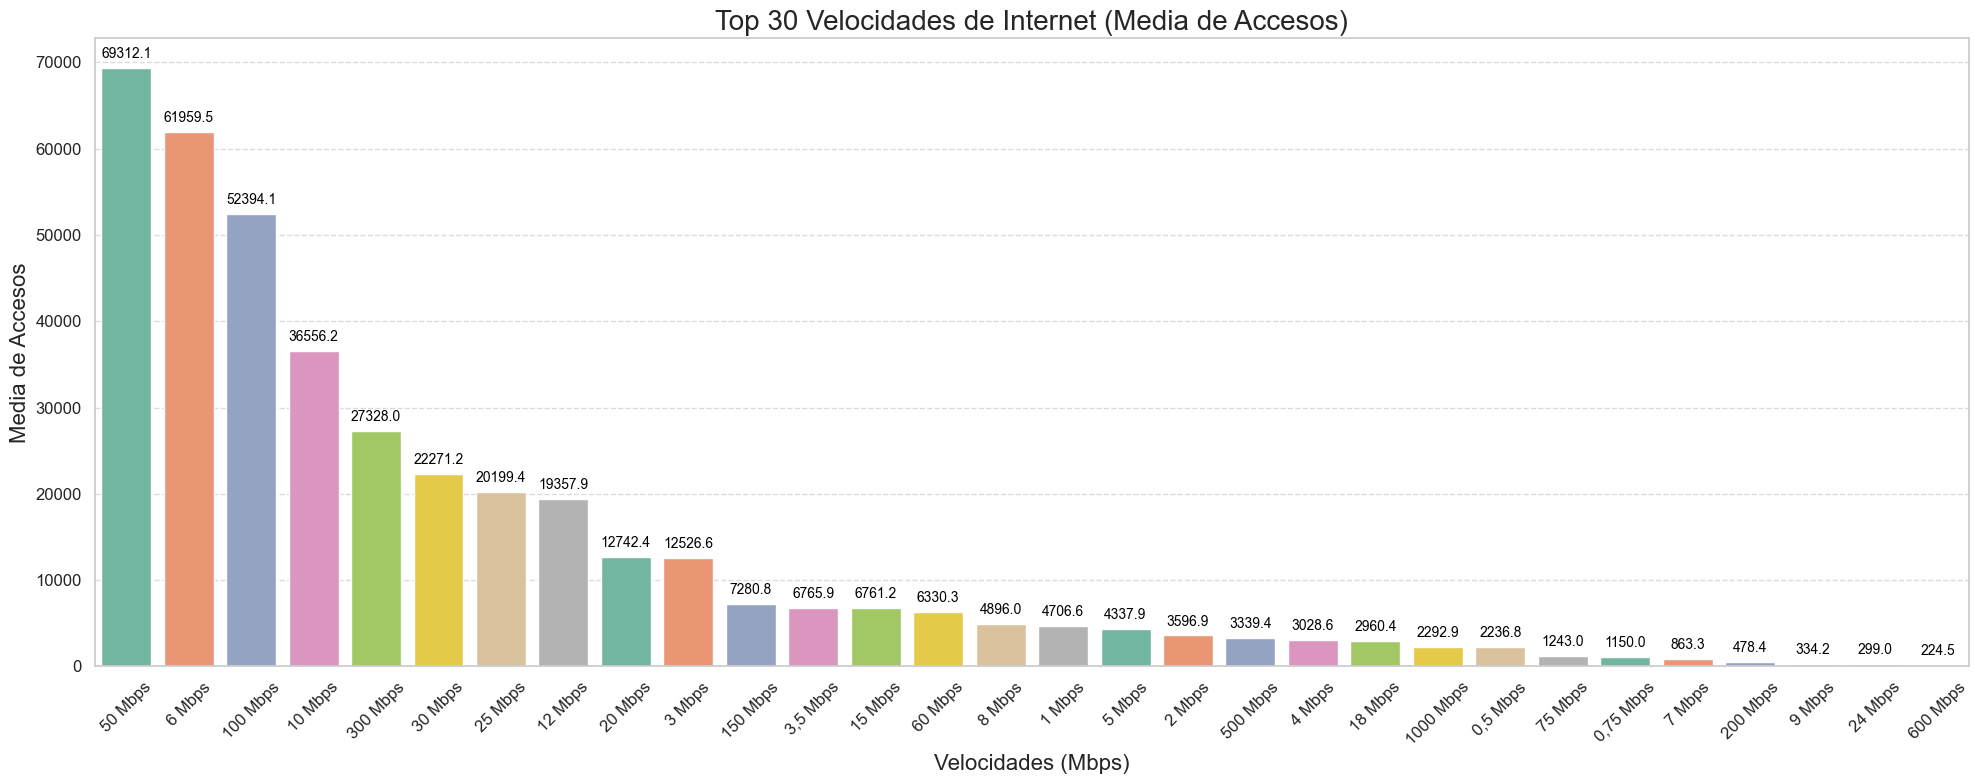

In [9]:
# Calculo la media de las columnas de velocidad
media_velocidades = df_velocidad_sin_Rangos.iloc[:, 4:].mean()

# Ordeno y selecciono las 30 velocidades más frecuentes
velocidades_mas_frecuentes = media_velocidades.sort_values(ascending=False).head(30)

# Grafico el histograma
plt.figure(figsize=(20, 8))  # Tamaño de figura ajustado
sns.set(style='whitegrid')  # Estilo de fondo

# Creo un grafico de barras
barplot = sns.barplot(x=velocidades_mas_frecuentes.index, 
                      y=velocidades_mas_frecuentes.values, 
                      palette='Set2', 
                      hue=velocidades_mas_frecuentes.index,
                      legend=False)  # Deshabilito leyenda

# Personalizo el titulo y los ejes
plt.title('Top 30 Velocidades de Internet (Media de Accesos)', fontsize=20)
plt.xlabel('Velocidades (Mbps)', fontsize=16)
plt.ylabel('Media de Accesos', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Agregi etiquetas a las barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 5),
                     textcoords='offset points')

# Añado una cuadricula horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajusto el layout para evitar superposiciones
plt.tight_layout()
plt.show()

In [10]:
velocidades_mas_frecuentes

50 Mbps      69312.131410
6 Mbps       61959.512821
100 Mbps     52394.083333
10 Mbps      36556.184295
300 Mbps     27327.953526
30 Mbps      22271.203526
25 Mbps      20199.350962
12 Mbps      19357.865385
20 Mbps      12742.381410
3 Mbps       12526.588141
150 Mbps      7280.818910
3,5 Mbps      6765.871795
15 Mbps       6761.160256
60 Mbps       6330.339744
8 Mbps        4896.003205
1 Mbps        4706.605769
5 Mbps        4337.883013
2 Mbps        3596.940705
500 Mbps      3339.423077
4 Mbps        3028.628205
18 Mbps       2960.411859
1000 Mbps     2292.948718
0,5 Mbps      2236.834936
75 Mbps       1242.956731
0,75 Mbps     1150.025641
7 Mbps         863.323718
200 Mbps       478.407051
9 Mbps         334.225962
24 Mbps        299.011218
600 Mbps       224.496795
dtype: float64

#### Analisis de las velocidades mas Frecuentes

* Dominio de Velocidades Altas: Las velocidades de 50 Mbps y 6 Mbps tienen la mayor media de accesos, lo que indica que los usuarios prefieren conexiones mas rapidas y estables.

* Bajo Interes en Velocidades Inferiores: Las velocidades mas bajas (como 0.5 Mbps y 1 Mbps) tienen una media de accesos muy baja, lo que sugiere que los consumidores estan menos interesados en opciones de baja velocidad y probablemente no puedan acceder a una mayor velocidad por falta de infraestructura.

* Oportunidad en Velocidades Intermedias: Velocidades como 10 Mbps y 12 Mbps muestran un numero considerable de accesos, lo que indica que hay un mercado potencial para mejorar y promocionar estas opciones.

* Crecimiento de la Demanda por Fibra optica: La alta media de accesos en velocidades superiores sugiere que la demanda por fibra optica y conexiones de alta velocidad esta en aumento, lo que representa una oportunidad para los proveedores de servicios.

* Desigualdad en el Acceso a Velocidades: La gran diferencia en la media de accesos entre las velocidades mas altas y las mas bajas resalta una desigualdad en el acceso a internet, lo que podría ser un punto de enfoque para iniciativas de inversion.

## 2. Analisis de la hoja 'Velocidad media por Provincia'

In [11]:
# Observo la estructura del dataset
df_velocidad_por_prov.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [12]:
# Observo algunos datos para tener una idea sobre la informacion
df_velocidad_por_prov.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


In [13]:
# Sumo los valores faltantes por columna
valores_faltantes = df_velocidad_por_prov.isnull().sum()
print(valores_faltantes)

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64


In [14]:
# Cuento los registros duplicados
duplicados = df_velocidad_por_prov.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 0


### - Tendencia temporal de velocidades

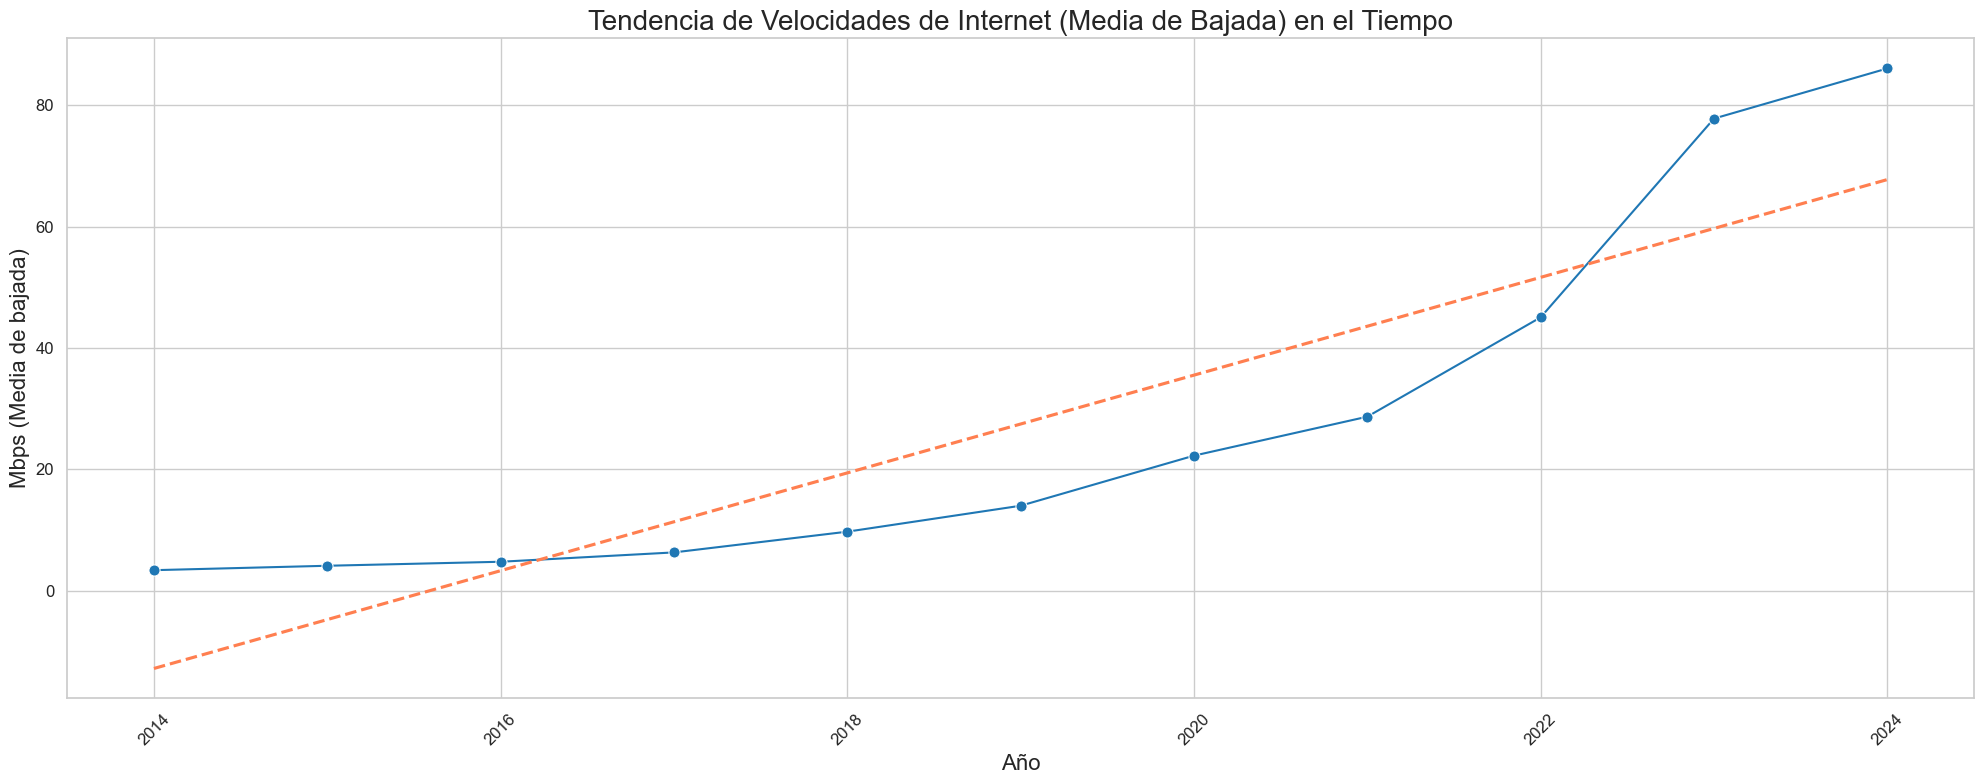

In [15]:
# Agrupo por año y calcular la media de Mbps
velocidad_tiempo = df_velocidad_por_prov.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()

# Creo un grafico de linea
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')  # Establecer estilo de fondo

# Establezco los marcadores para la linea
lineplot = sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=velocidad_tiempo, 
                        color='#1f77b4', marker='o', markersize=8)

# Personalizo el titulo y los ejes
plt.title('Tendencia de Velocidades de Internet (Media de Bajada) en el Tiempo', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Velocidad Media (Mbps)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Agrego una linea de tendencia
sns.regplot(x='Año', y='Mbps (Media de bajada)', data=velocidad_tiempo, 
            scatter=False, color='cadetblue', ci=None, line_kws={'linestyle': '--', 'color': 'coral'})

# Ajusto el layout para evitar superposiciones
plt.tight_layout()
plt.show()

#### Analisis Tendencia temporal de velocidades

* Tendencia General: Se observa una clara tendencia ascendente en las velocidades promedio de descarga a lo largo de los años. Esto indica una mejora en la infraestructura y tecnologia de internet.

* Crecimiento Sostenido: La velocidad media de descarga ha mostrado un crecimiento sostenido desde 2014, lo que indica una mejora continua en la infraestructura de internet.

* Aceleracion en el Crecimiento: A partir de 2019, se observa un crecimiento exponencial de las velocidades, lo que podria estar relacionado con la implementación de nuevas tecnologias, como la fibra optica, un aumento en la competencia entre proveedores de servicios, o un aumento en la infraestructura en general.

* Expectativas Futuras: La proyeccion hasta 2024 sugiere que se espera que las velocidades continuen aumentando, lo que puede ser un indicativo de inversiones futuras en tecnologia y servicios de internet.

* Impacto en el Usuario: Con el aumento de las velocidades, los usuarios pueden experimentar una mejor calidad de servicio, lo que puede influir en el consumo de contenido en linea, como streaming y juegos en linea.

* Oportunidades de Mercado: El aumento en la velocidad media puede abrir oportunidades para nuevos servicios y aplicaciones que requieren mayor ancho de banda, como la realidad virtual o el trabajo remoto.


### - Comparativa de velocidades por Provincia 

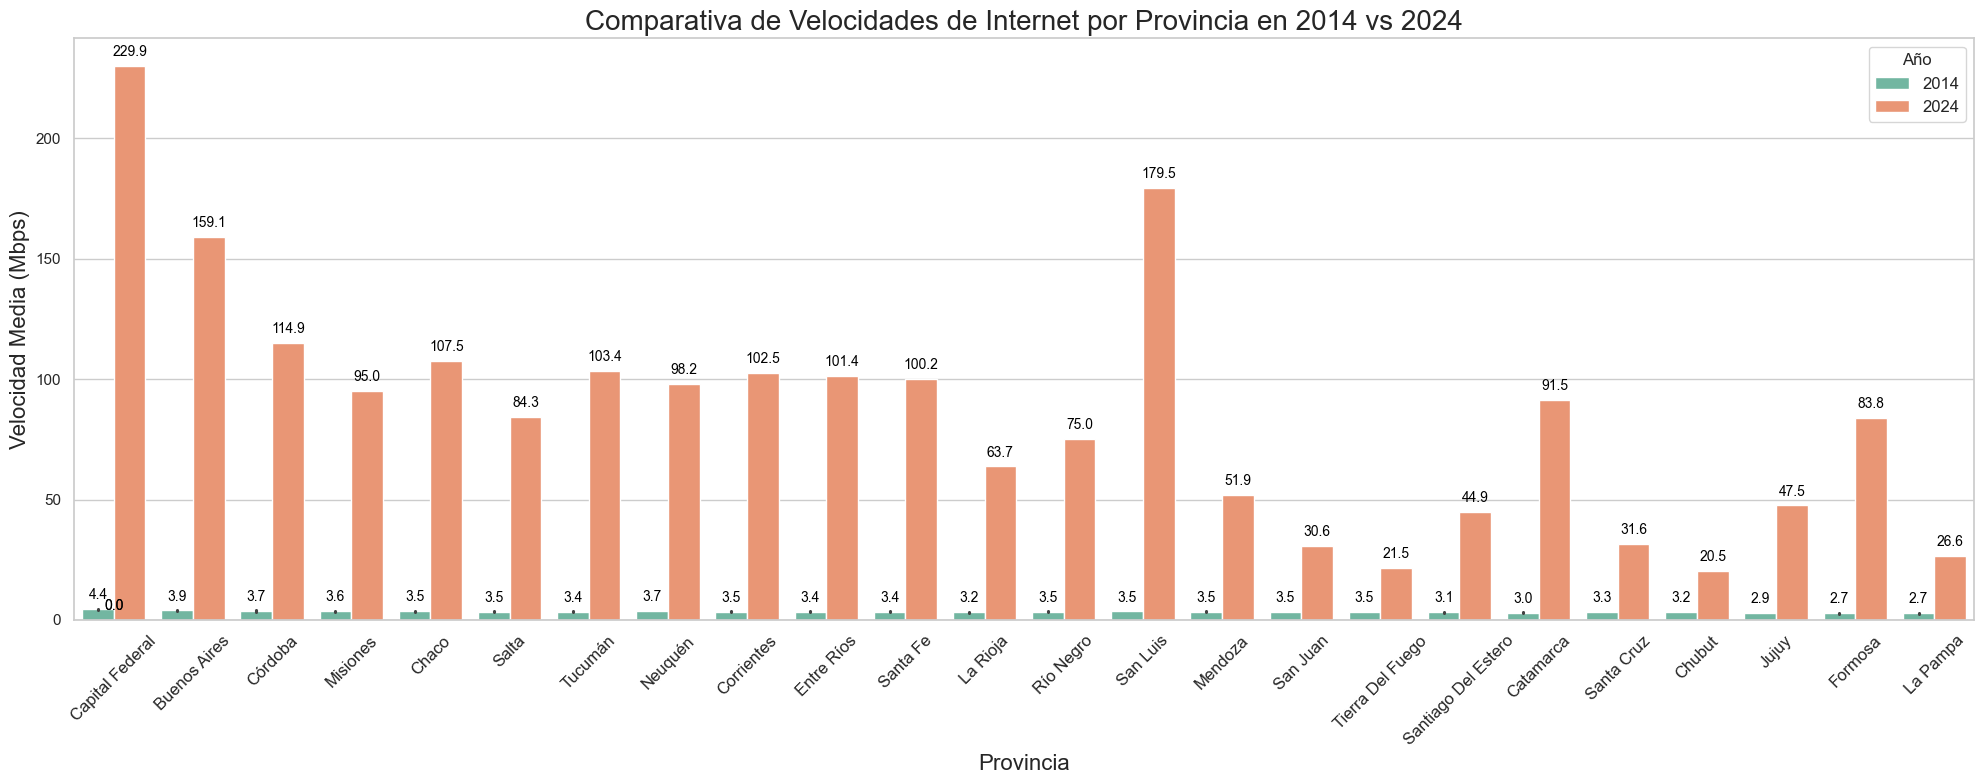

In [16]:
# Filtro los datos para los años 2014 y 2024 para realizar una comparacion del aumento de la velocidad media
velocidad_prov_2014_2024 = df_velocidad_por_prov[df_velocidad_por_prov['Año'].isin([2014, 2024])]

# Ordeno los datos por velocidad media en 2024 para una mejor comparacion
velocidad_prov_2014_2024 = velocidad_prov_2014_2024.sort_values(by=['Año', 'Mbps (Media de bajada)'], ascending=[True, False])

# Creo un grafico de barras lado a lado para 2014 y 2024 para tener una mejor comparativa
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')  # Establecer estilo de fondo
barplot = sns.barplot(x='Provincia', y='Mbps (Media de bajada)', hue='Año', 
                      data=velocidad_prov_2014_2024, palette='Set2')

# Personalizo el titulo y los ejes
plt.title('Comparativa de Velocidades de Internet por Provincia en 2014 vs 2024', fontsize=20)
plt.xlabel('Provincia', fontsize=16)
plt.ylabel('Velocidad Media (Mbps)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Año', fontsize=12)

# Agrego etiquetas a las barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

plt.tight_layout()  # Ajusto el layout para evitar superposiciones
plt.show()

#### Analisis de la comparativa de velocidades por provincia entre 2014 y 2024

* Desigualdad Regional: Hay una gran disparidad en las velocidades de internet entre las provincias. Por ejemplo, Buenos Aires y San Luis tienen velocidades significativamente más altas en comparación con provincias como Chaco y La Pampa. Esto puede indicar oportunidades para empresas que busquen expandir su infraestructura en areas con menor velocidad.

* Crecimiento Notable: Provincias como San Luis y Neuquen muestran un crecimiento notable en las velocidades de internet, lo que sugiere que estas areas estan invirtiendo en mejorar su infraestructura. Esto puede ser atractivo para empresas que buscan asociarse con proveedores locales o invertir en estas regiones.

* Mercado Potencial: Las provincias con velocidades mas bajas en 2024, como Chaco y Formosa, representan un mercado potencial para la expansion de servicios de internet. Las empresas podrian considerar estrategias para mejorar la conectividad en estas areas, lo que podria resultar en un aumento de la demanda.

* Estrategias de Marketing Localizadas: Dado que las velocidades de internet varian significativamente, las empresas pueden desarrollar estrategias de marketing especificas para cada provincia, destacando las ventajas de sus servicios en areas donde la competencia es menor.

* Inversión en Tecnologia: La tendencia de aumento en las velocidades sugiere que las empresas de telecomunicaciones deben seguir invirtiendo en tecnología y infraestructura para mantenerse competitivas y satisfacer la creciente demanda de servicios de alta velocidad.

* Impacto en el Teletrabajo y Educacion: Con el aumento de las velocidades, se espera que mas personas trabajen y estudien desde casa. Esto puede influir en la demanda de servicios adicionales, como plataformas de videoconferencia y herramientas de colaboracion, lo que representa una oportunidad para empresas tecnologicas.

* Colaboraciones Estrategicas: Las empresas podrian considerar colaboraciones con gobiernos locales o instituciones educativas para mejorar la infraestructura de internet en provincias con velocidades mas bajas, lo que podria resultar en beneficios mutuos.


### - Comparativa de la tendencia de velocidades entre 2014 y 2024

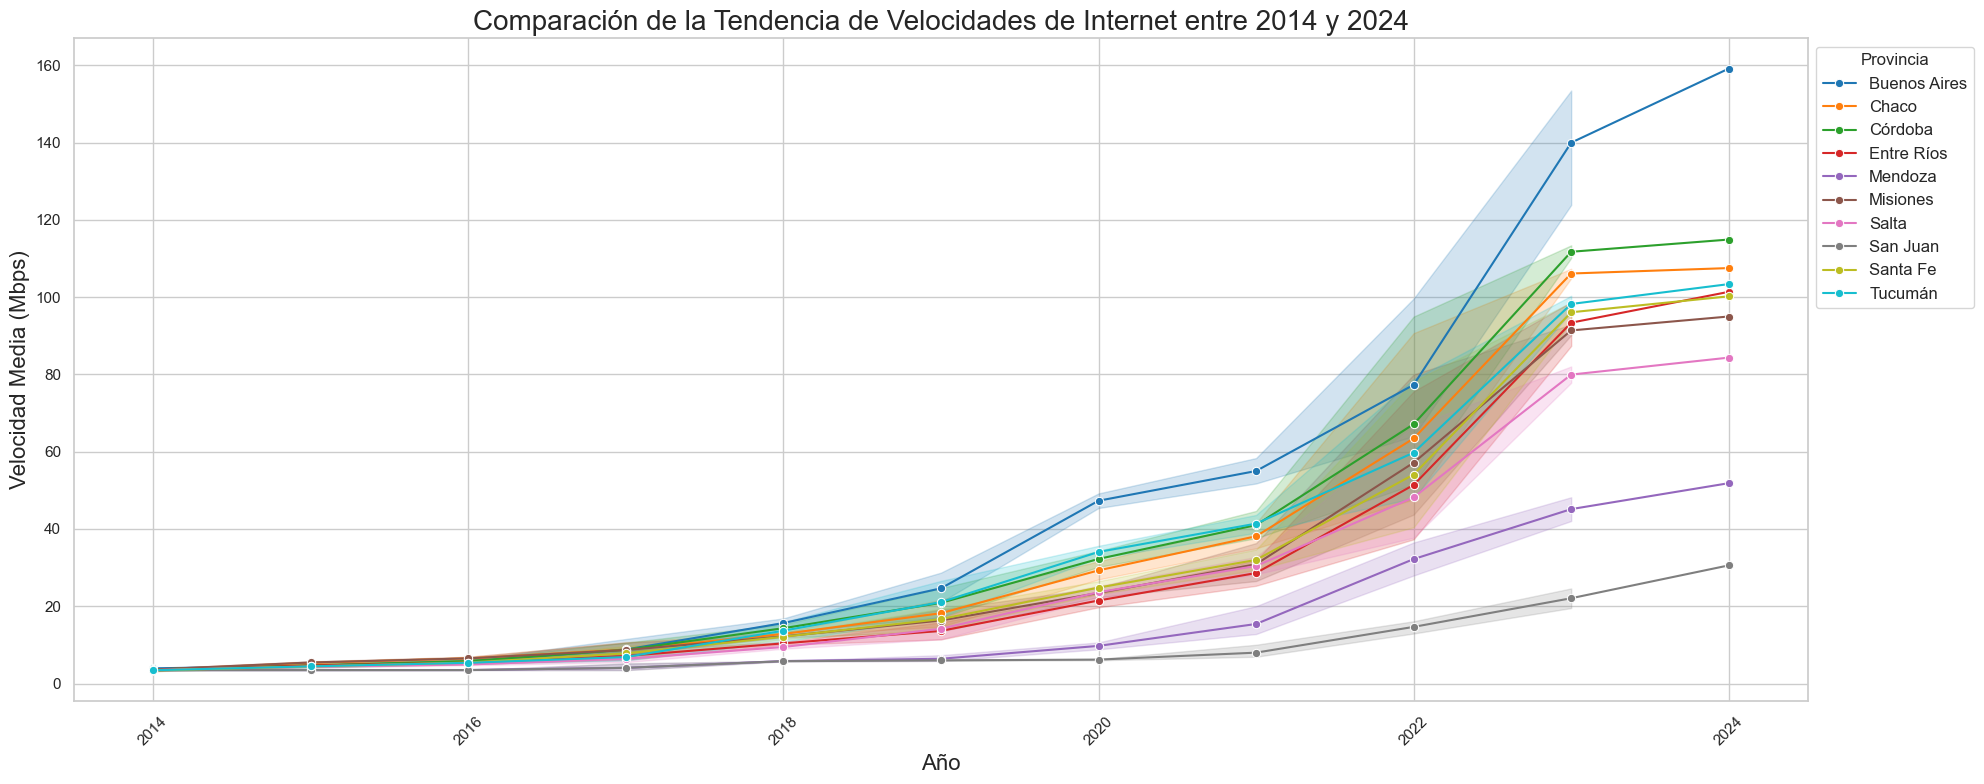

In [17]:
# Defino las 10 provincias más importantes
provincias_importantes = ['Buenos Aires', 'Córdoba', 'Santa Fe', 'Mendoza', 'Tucumán', 
                          'Salta', 'Chaco', 'Entre Ríos', 'Misiones', 'San Juan']

# Filtro los datos de esas provincias
df_provincias_importantes = df_velocidad_por_prov[df_velocidad_por_prov['Provincia'].isin(provincias_importantes)]

# Creo un gráfico de lineas para comparar las 10 provincias
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')  # Establecer estilo de fondo
lineplot = sns.lineplot(x='Año', y='Mbps (Media de bajada)', hue='Provincia', 
                         data=df_provincias_importantes, palette='tab10', marker='o')

# Personalizo el titulo y los ejes
plt.title('Comparación de la Tendencia de Velocidades de Internet entre 2014 y 2024', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Velocidad Media (Mbps)', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Provincia', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)  # Mover leyenda a la derecha

# Agrego una cuadricula para facilitar la lectura
plt.grid(visible=True)

# Ajusto el layout para que no se corten los elementos
plt.tight_layout()

# Muestro el grafico
plt.show()

#### Analisis de la comparativa de velocidades por provincia entre 2014 y 2024

* Liderazgo: Buenos Aires se destaca como la provincia con las velocidades de internet más altas, lo que sugiere que es un mercado clave para empresas de telecomunicaciones y servicios digitales.

* Crecimiento Acelerado en Provincias Menores: Provincias como Tucumán y Mendoza muestran un crecimiento acelerado en sus velocidades de internet, lo que indica una mejora en la infraestructura y una posible oportunidad de mercado para nuevos servicios.

* Desigualdad Regional Persistente: A pesar del crecimiento general, persiste una desigualdad significativa en las velocidades de internet entre provincias. Chaco, por ejemplo, se mantiene con velocidades considerablemente mas bajas, lo que representa una oportunidad para inversiones en infraestructura.

* Proyeccion de Crecimiento: La tendencia de aumento en las velocidades sugiere que el mercado de internet seguira expandiendose, lo que puede ser atractivo para empresas que buscan invertir en tecnologaa y servicios de alta velocidad.

### - Variacion estacional de las velocidades de Internet

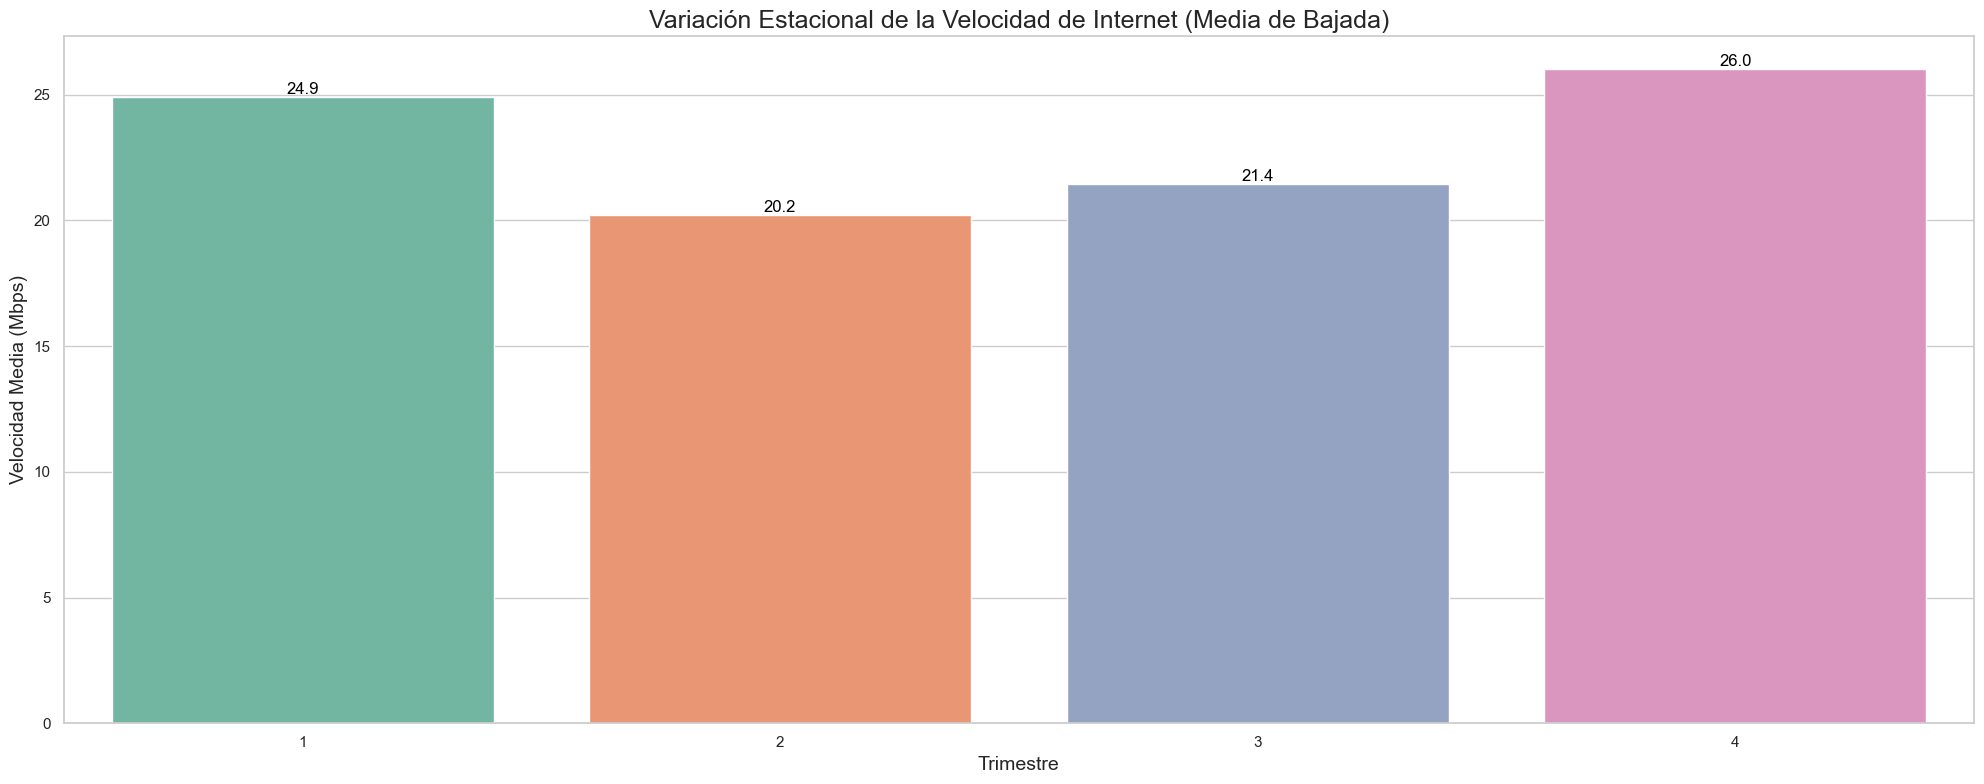

In [18]:
# Agrupo por trimestre y calculo la media de Mbps
velocidad_trimestre = df_velocidad_por_prov.groupby('Trimestre')['Mbps (Media de bajada)'].mean().reset_index()

# Defino el estilo de Seaborn
sns.set(style='whitegrid')

# Defino el tamaño de la figura
plt.figure(figsize=(20, 8))

# Creo un grafico de barras por trimestre
barplot = sns.barplot(x='Trimestre', y='Mbps (Media de bajada)', data=velocidad_trimestre, 
                      palette='Set2', hue='Trimestre', errorbar=None, legend=False)

# Personalizo el titulo y los ejes
plt.title('Variación Estacional de la Velocidad de Internet (Media de Bajada)', fontsize=18)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Velocidad Media (Mbps)', fontsize=14)

# Agrego etiquetas dentro de las barras
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=12, color='black')

# Ajusto el layout para que no se corten los elementos
plt.tight_layout()

# Muestro el grafico
plt.show()

#### Analisis de la variacion estacional de la velocidad de Internet

* Pico de Velocidad en el Cuarto Trimestre: Como se observa en el grafico el cuarto trimestre es cuando se alcanzan las velocidades mas altas de internet, lo que podria sugerir un mayor consumo de servicios digitales durante el fin de año, coincidiendo con eventos y celebraciones.

* Aumento de la Demanda: Este aumento en las velocidades durante el cuarto trimestre puede estar relacionado con un incremento en la demanda de streaming, compras en línea y otras actividades digitales durante la temporada de fiestas.

* Oportunidades de Marketing de Fin de Año: Las empresas pueden aprovechar el pico de velocidad del cuarto trimestre para lanzar campañas de marketing enfocadas en servicios que requieren mayor ancho de banda, como plataformas de entretenimiento y comercio electronico.

* Estrategia de Marketing para Comercios Digitales: Durante el cuarto trimestre, es clave ofrecer opciones de internet más rápidas a empresas que operan digitalmente. Esto asegurará que puedan manejar el aumento de solicitudes y transacciones en épocas de alta demanda, como fin de año.

## Analisis de la hoja 'totales_accesos_por_Tecnologia'

In [19]:
# Observo la estructura del dataset
df_totales_accesos_por_Tecnologia.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           41 non-null     int64 
 1   Trimestre     41 non-null     int64 
 2   ADSL          41 non-null     int64 
 3   Cablemodem    41 non-null     int64 
 4   Fibra óptica  41 non-null     int64 
 5   Wireless      41 non-null     int64 
 6   Otros         41 non-null     int64 
 7   Total         41 non-null     int64 
 8   Periodo       41 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.0+ KB


In [20]:
# Observo algunos datos para tener una idea sobre la informacion
df_totales_accesos_por_Tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
1,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
2,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
3,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
4,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023


In [21]:
# Sumo los valores faltantes por columna
valores_faltantes = df_totales_accesos_por_Tecnologia.isnull().sum()
print(valores_faltantes)

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64


In [22]:
# Cuento los registros duplicados
duplicados = df_totales_accesos_por_Tecnologia.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 0


### -Evolucion del acceso a las tecnologias

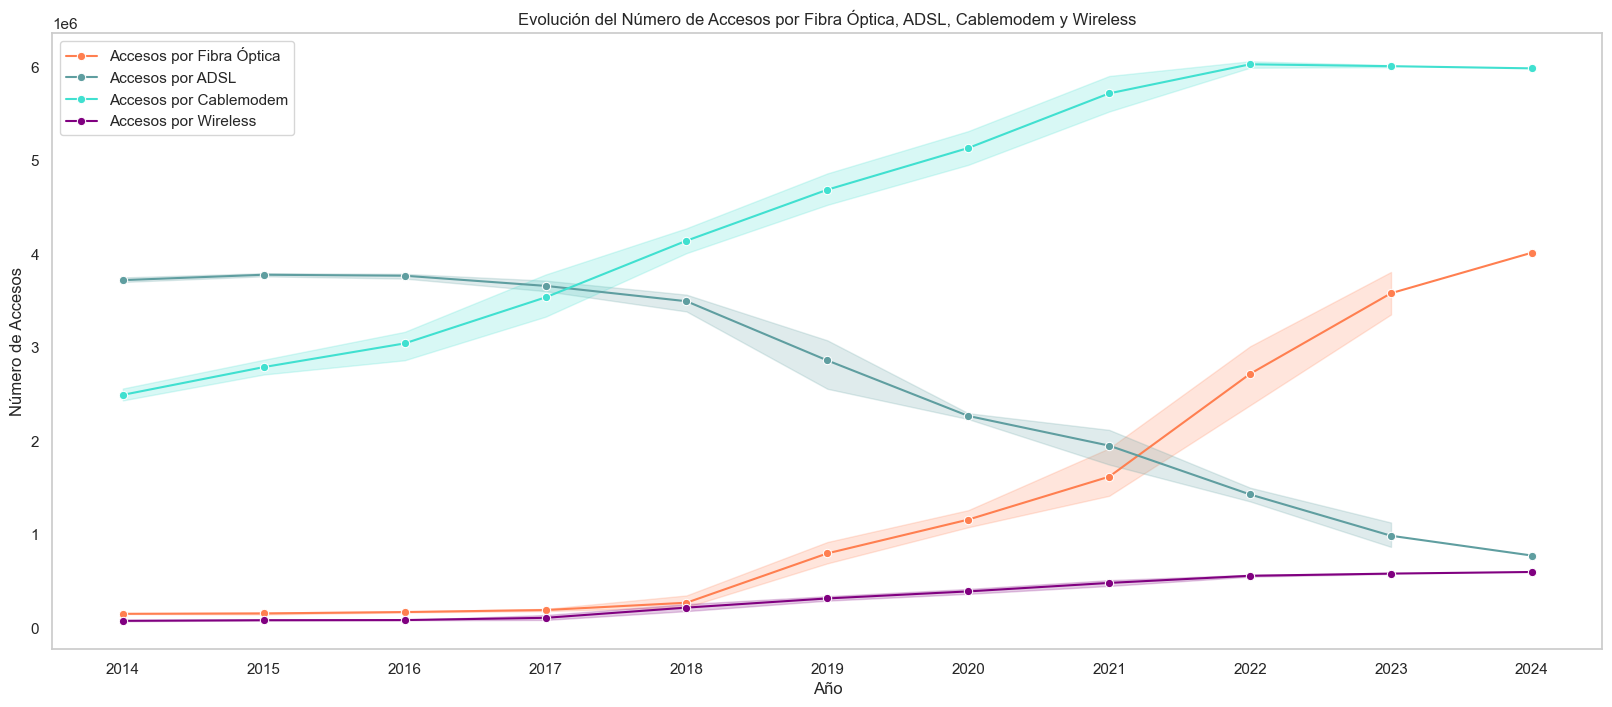

In [23]:
# Calculo los accesos totales de Fibra optica y ADSL + Cablemodem + Wireless
df_total_accesos = df_totales_accesos_por_Tecnologia[['Año', 'Trimestre', 'Fibra óptica', 'Total']].copy()

# Tomo los accesos totales de cada tecnologia
df_total_accesos['Accesos ADSL'] = df_totales_accesos_por_Tecnologia['ADSL']
df_total_accesos['Accesos Cablemodem'] = df_totales_accesos_por_Tecnologia['Cablemodem']
df_total_accesos['Accesos Wireless'] = df_totales_accesos_por_Tecnologia['Wireless']  # Añadir accesos de Wireless
df_total_accesos['Accesos Totales'] = (df_total_accesos['Fibra óptica'] + 
                                        df_total_accesos['Accesos ADSL'] + 
                                        df_total_accesos['Accesos Cablemodem'] + 
                                        df_total_accesos['Accesos Wireless'])  # Actualizar accesos totales

# Configuro el tamaño del grafico
plt.figure(figsize=(20, 8))

# Grafico de accesos totales por Fibra Óptica, ADSL, Cable Modem y Wireless
sns.lineplot(x='Año', y='Fibra óptica', data=df_total_accesos, marker='o', color='coral', label='Accesos por Fibra Óptica')
sns.lineplot(x='Año', y='Accesos ADSL', data=df_total_accesos, marker='o', color='cadetblue', label='Accesos por ADSL')
sns.lineplot(x='Año', y='Accesos Cablemodem', data=df_total_accesos, marker='o', color='turquoise', label='Accesos por Cablemodem')
sns.lineplot(x='Año', y='Accesos Wireless', data=df_total_accesos, marker='o', color='purple', label='Accesos por Wireless')

# Ajusto y personalizo el titulo y los ejes
plt.title('Evolución del Número de Accesos por Fibra Óptica, ADSL, Cablemodem y Wireless')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.xticks(df_total_accesos['Año'].unique())
plt.legend()
plt.grid()
plt.show()

#### Análisis de la evolucion de los accesos a las tecnologias entre 2014 y 2024

las tendencias observadas:

* Fibra Optica:
La linea correspondiente a los accesos por fibra optica muestra un crecimiento constante y significativo a lo largo de los años, alcanzando casi 4 millones de accesos en 2024. Esto indica una rápida adopción de esta tecnologia.

* ADSL:
La linea de ADSL presenta una tendencia a la baja, comenzando con un numero considerable de accesos y disminuyendo gradualmente. Esto sugiere que los usuarios están migrando a tecnologias mas avanzadas.

* Cablemodem:
Similar a ADSL, la linea de Cablemodem tambien muestra una disminucion en el numero de accesos. Comenzo con un numero moderado de accesos, pero ha ido cayendo a lo largo de los años.

* Wireless:
La linea de accesos por Wireless se mantiene relativamente baja en comparacion con las otras tecnologias. Aunque muestra un ligero aumento, no alcanza los niveles de crecimiento de la 
fibra optica.

Conclusiones:
- La fibra optica es la tecnologia que mas crece, mientras que ADSL y Cablemodem estan en declive.
- La adopción de tecnologias más modernas está reemplazando a las más antiguas, reflejando una tendencia hacia una mayor conectividad y acceso a Internet.
- El ligero crecimiento de las conexiones Wireless, aunque modesto, señala oportunidades en regiones rurales o zonas de difícil acceso donde la fibra óptica no es viable. Se recomienda aumentar la inversión en estas áreas, donde las opciones de conectividad son limitadas.

### -Tasa de crecimiento anual de las tecnologias

In [24]:
# Creo una funcion para calcular la Tasa de Crecimiento Anual Compuesta (CAGR)
def calcular_cagr(valor_inicial, valor_final, n):
    """
    Calcula la Tasa de Crecimiento Anual Compuesta (CAGR).
    
    Parametros:
        valor_inicial (float): Valor al inicio del periodo.
        valor_final (float): Valor al final del periodo.
        n (int): Número de años en el periodo.
    
    Retorna:
    float: Tasa de crecimiento anual compuesta.
    """
    return ((valor_final / valor_inicial) ** (1 / n)) - 1

# Defino el número de años de referencia para el cálculo
n = 2024 - 2014

# Obtengo los valores iniciales y finales de cada tecnología desde el DataFrame
accesos_inicial_fibra = df_totales_accesos_por_Tecnologia[df_totales_accesos_por_Tecnologia['Año'] == 2014]['Fibra óptica'].values[0]
accesos_final_fibra = df_totales_accesos_por_Tecnologia[df_totales_accesos_por_Tecnologia['Año'] == 2024]['Fibra óptica'].values[0]

accesos_inicial_adsl = df_totales_accesos_por_Tecnologia[df_totales_accesos_por_Tecnologia['Año'] == 2014]['ADSL'].values[0]
accesos_final_adsl = df_totales_accesos_por_Tecnologia[df_totales_accesos_por_Tecnologia['Año'] == 2024]['ADSL'].values[0]

accesos_inicial_cablemodem = df_totales_accesos_por_Tecnologia[df_totales_accesos_por_Tecnologia['Año'] == 2014]['Cablemodem'].values[0]
accesos_final_cablemodem = df_totales_accesos_por_Tecnologia[df_totales_accesos_por_Tecnologia['Año'] == 2024]['Cablemodem'].values[0]

accesos_inicial_wireless = df_totales_accesos_por_Tecnologia[df_totales_accesos_por_Tecnologia['Año'] == 2014]['Wireless'].values[0]
accesos_final_wireless = df_totales_accesos_por_Tecnologia[df_totales_accesos_por_Tecnologia['Año'] == 2024]['Wireless'].values[0]


# Calculo la Tasa de crecimiento anual para cada tecnología usando la función definida
cagr_fibra = calcular_cagr(accesos_inicial_fibra, accesos_final_fibra, n)
cagr_adsl = calcular_cagr(accesos_inicial_adsl, accesos_final_adsl, n)
cagr_cablemodem = calcular_cagr(accesos_inicial_cablemodem, accesos_final_cablemodem, n)
cagr_wireless = calcular_cagr(accesos_inicial_wireless, accesos_final_wireless, n)


# Muestro los resultados en pantalla
print(f"La tasa de crecimiento anual de Fibra Óptica (2014-2024) es de: {cagr_fibra * 100:.2f}%")
print(f"La tasa de crecimiento anual de ADSL (2014-2024) es de: {cagr_adsl * 100:.2f}%")
print(f"La tasa de crecimiento anual de Cablemodem (2014-2024) es de: {cagr_cablemodem * 100:.2f}%")
print(f"La tasa de crecimiento anual de Wireless (2014-2024) es de: {cagr_wireless * 100:.2f}%")



La tasa de crecimiento anual de Fibra Óptica (2014-2024) es de: 38.95%
La tasa de crecimiento anual de ADSL (2014-2024) es de: -14.62%
La tasa de crecimiento anual de Cablemodem (2014-2024) es de: 8.97%
La tasa de crecimiento anual de Wireless (2014-2024) es de: 22.77%


#### Análisis de la tasa de crecimiento anual de las tecnologias

* Dominio de la Fibra Óptica:
La alta tasa de crecimiento de la fibra óptica indica que se está convirtiendo rápidamente en la tecnología de acceso preferida en comparación con ADSL y Cablemodem. Esto podria tener implicaciones importantes para la planificacion de infraestructura y la inversion en conectividad de alta velocidad.

* Desplazamiento de ADSL:
La caída en el uso de ADSL es un indicativo claro de que los consumidores están buscando mejores opciones. Esto puede ser una señal para los proveedores de servicios de internet (ISP) de que deben adaptar sus ofertas para centrarse más en tecnologías de fibra y menos en ADSL.
Oportunidades en Wireless:

* Posibles inversiones: 
Dado el crecimiento significativo en el acceso inalámbrico, hay oportunidades para invertir en mejorar y expandir la infraestructura de redes inalámbricas, especialmente en áreas rurales o menos accesibles donde la fibra óptica no llega fácilmente.
Diversificación en Otras Tecnologías:

-Recomendaciones Estratégicas:

* Para marketing: Considerar estrategias para migrar a los clientes de ADSL a opciones mas avanzadas, como la fibra optica.
* Para Politicas Publicas: Invertir en infraestructura de fibra óptica podría ser clave para mejorar la conectividad en regiones con menor acceso.
* Para Inversores: Explorar oportunidades en empresas que esten centradas en la expansion de la fibra optica y tecnologias inalambricas.

### -Correlacion entre tecnologias

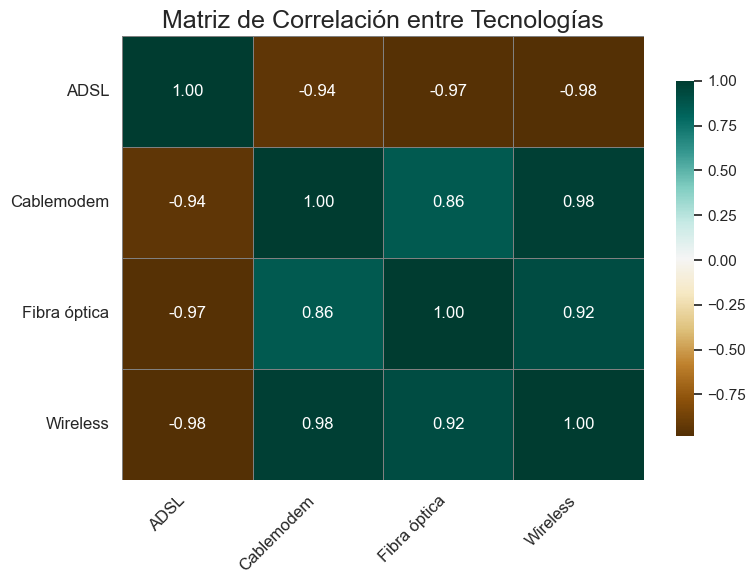

In [25]:
# Calculo las correlaciones entre tecnologias por provincia
correlation_matrix = df_totales_accesos_por_Tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].corr()

# Defino el estilo de Seaborn
sns.set(style='white')

# Defino el tamaño de la figura
plt.figure(figsize=(8, 6))

# Creo un grafico con la matriz de correlación
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f',
                       cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='gray')

# Personalizo el titulo y los ejes
plt.title('Matriz de Correlación entre Tecnologías', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Ajusto el layout para que no se corten los elementos
plt.tight_layout()

# Muestro el grafico
plt.show()

Correlaciones Fuertes y Negativas:

* ADSL y Cablemodem: La correlación de -0.94 indica una relación inversa muy fuerte. Esto sugiere que a medida que aumenta el uso de Cablemodem, el uso de ADSL tiende a disminuir significativamente.

* ADSL y Fibra óptica: La correlación de -0.97 también muestra una relación inversa fuerte, indicando que el aumento en la adopción de Fibra óptica está asociado con una disminución en el uso de ADSL.

* ADSL y Wireless: La correlación de -0.98 es la más alta entre las tecnologías, lo que implica que el crecimiento en el uso de Wireless está fuertemente relacionado con la disminución del uso de ADSL.

Correlaciones Positivas:

* Cablemodem y Fibra óptica: La correlación de 0.86 indica una relación positiva, lo que sugiere que a medida que aumenta el uso de Cablemodem, también lo hace el uso de Fibra óptica, aunque no tan fuertemente como las correlaciones negativas con ADSL.

* Cablemodem y Wireless: La correlación de 0.98 es muy alta, lo que sugiere que el uso de Cablemodem y Wireless tiende a aumentar juntos.

* Fibra óptica y Wireless: La correlación de 0.92 también indica una relación positiva fuerte, lo que sugiere que a medida que se adopta más la Fibra óptica, también se incrementa el uso de Wireless.

Desplazamiento de Tecnologías: 
* La fuerte correlación negativa entre ADSL y las otras tecnologías sugiere que ADSL está siendo desplazada por opciones más modernas como Cablemodem, Fibra óptica y Wireless. Esto puede ser indicativo de una tendencia hacia tecnologías más rápidas y eficientes.

Adopción de Nuevas Tecnologías: 
* La correlación positiva entre Cablemodem, Fibra óptica y Wireless sugiere que los usuarios están adoptando múltiples tecnologías de acceso a Internet, posiblemente para mejorar la conectividad y la velocidad.

## Analisis de la hoja 'accesos_por_tecnologia' por Provincia

In [26]:
# Observo la estructura del dataset
df_accesos_por_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


In [27]:
# Observo algunos datos para tener una idea sobre la informacion
df_accesos_por_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [28]:
# Sumo los valores faltantes por columna
valores_faltantes = df_accesos_por_tecnologia.isnull().sum()
print(valores_faltantes)

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64


In [29]:
# Al observar que existen dos (2) datos faltantes en el dataframe verifico la informacion de la filas
filas_faltantes = df_accesos_por_tecnologia.loc[df_accesos_por_tecnologia.isnull().any(axis=1)]
filas_faltantes

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Elimino las fila despues de verificar que se trata de una nota dejada dentro de la hoja
df_accesos_por_tecnologia = df_accesos_por_tecnologia.dropna()
valores_faltantes = df_accesos_por_tecnologia.isnull().sum()

# Observo que ya no hay datos faltante en ninguna columna
print(valores_faltantes)

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64


In [31]:
# Cuento los registros duplicados
duplicados = df_accesos_por_tecnologia.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 0


In [32]:
# Al tener un error con los años reviso que los datos esten escritos de manera correcta
print(df_accesos_por_tecnologia['Año'].unique())

[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014]


In [33]:
# Al tener un error con los trimestres reviso que los datos esten escritos de manera correcta
print(df_accesos_por_tecnologia['Trimestre'].unique())

[1 4 3 2 '3 *' '2 *' '1 *']


In [34]:
# Limpio la columna 'año'
df_accesos_por_tecnologia['Año'] = df_accesos_por_tecnologia['Año'].astype(str).str.replace(' *', '', regex=True)
df_accesos_por_tecnologia['Trimestre'] = df_accesos_por_tecnologia['Trimestre'].astype(str).str.replace(' *', '', regex=True)

# Convierto la columna a dato numerico
df_accesos_por_tecnologia['Año'] = pd.to_numeric(df_accesos_por_tecnologia['Año'], errors='coerce')
df_accesos_por_tecnologia['Trimestre'] = pd.to_numeric(df_accesos_por_tecnologia['Trimestre'], errors='coerce')
df_accesos_por_tecnologia = df_accesos_por_tecnologia.dropna(subset=['Año'])
df_accesos_por_tecnologia = df_accesos_por_tecnologia.dropna(subset=['Trimestre'])

#Convierto a tipo entero
df_accesos_por_tecnologia['Año'] = df_accesos_por_tecnologia['Año'].astype(int)
df_accesos_por_tecnologia['Trimestre'] = df_accesos_por_tecnologia['Trimestre'].astype(int)

# Verifico la correccion
print(df_accesos_por_tecnologia['Año'].unique())
print(df_accesos_por_tecnologia['Trimestre'].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
[1 4 3 2]


#### - Comparación de Accesos por Tecnología en Provincias

* Para observar mejor las provincias creo un grafico divido por tecnologia

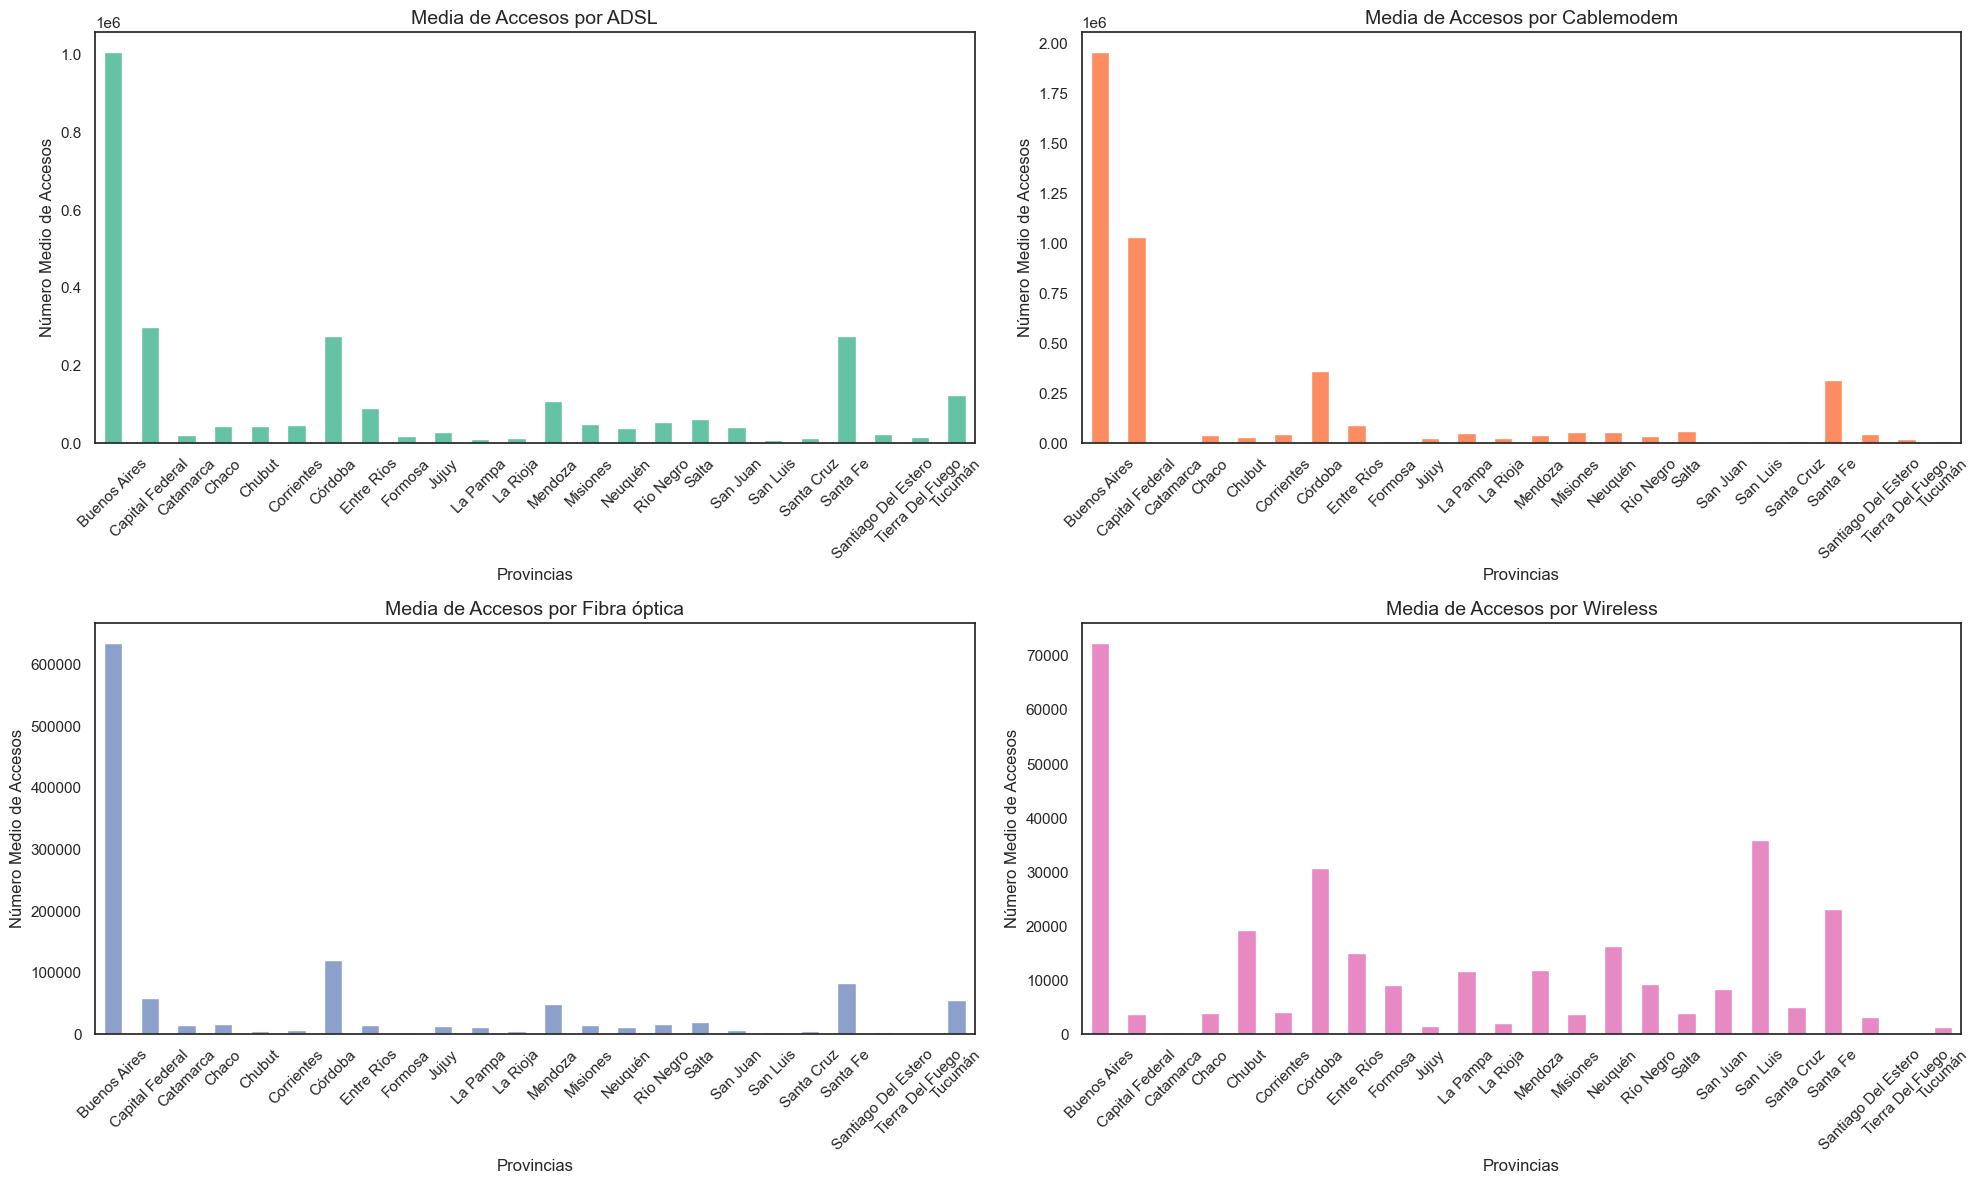

In [35]:
# Agrupo por provincia y calculo la media de los accesos por tecnología
df_media_accesos = df_accesos_por_tecnologia.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].mean().reset_index()

# Establezco la provincia como indice
df_media_accesos.set_index('Provincia', inplace=True)

# Creo una figura con 2 filas y 2 columnas para ver mejor la comparacion
fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # Ajustar el tamaño de la figura

# Defino la paleta de colores
colors = sns.color_palette('Set2')

# GCreo un grafico de cada tecnología en un subgrafico
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']
for i, tecnologia in enumerate(tecnologias):
    ax = axs[i // 2, i % 2]  # Determino la posición del subgráfico
    df_media_accesos[tecnologia].plot(kind='bar', ax=ax, color=colors[i])
    ax.set_title(f'Media de Accesos por {tecnologia}', fontsize=14)
    ax.set_xlabel('Provincias', fontsize=12)
    ax.set_ylabel('Número Medio de Accesos', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Roto las etiquetas del eje x

# Ajustoel layout para que no se superpongan los elementos y muestro los graficos
plt.tight_layout()
plt.show()

#### Analisis de la comparacion de Accesos por Tecnologia en Provincias

* Crecimiento de la Fibra optica: Aunque la fibra optica tiene un numero medio de accesos mas bajo en general, Buenos Aires también lidera en esta categoría, sugiriendo que la adopción de tecnologías mas avanzadas está comenzando a crecer en áreas urbanas.

* Baja Diversidad Tecnológica en Provincias: La mayoría de las provincias presentan un numero bajo de accesos en comparación con Buenos Aires, lo que sugiere una dependencia de tecnologías tradicionales y una falta de diversificación en el acceso a internet.

* Crecimiento de la Fibra Optica: Aunque la fibra optica tiene un numero de accesos bajo en general, su presencia en Buenos Aires indica un potencial de crecimiento en el futuro, especialmente si se invierte en infraestructura.

* Infraestructura en Provincias: Considerar la inversión en infraestructura de internet en provincias con bajos niveles de acceso. Esto no solo ayudaría a cerrar la brecha digital, sino que también podría generar un nuevo mercado de consumidores.

* Desarrollo de Soluciones Wireless: Invertir en tecnologías wireless en áreas donde la conectividad es limitada. Esto podría incluir el uso de redes de última milla y mejoras en la tecnologia satelital.

* Colaboraciones Estratégicas: Buscar alianzas con proveedores de telecomunicaciones y empresas tecnológicas para mejorar la infraestructura existente y expandir servicios en áreas menos atendidas.

#### - Penetración de Fibra Óptica por Provincia

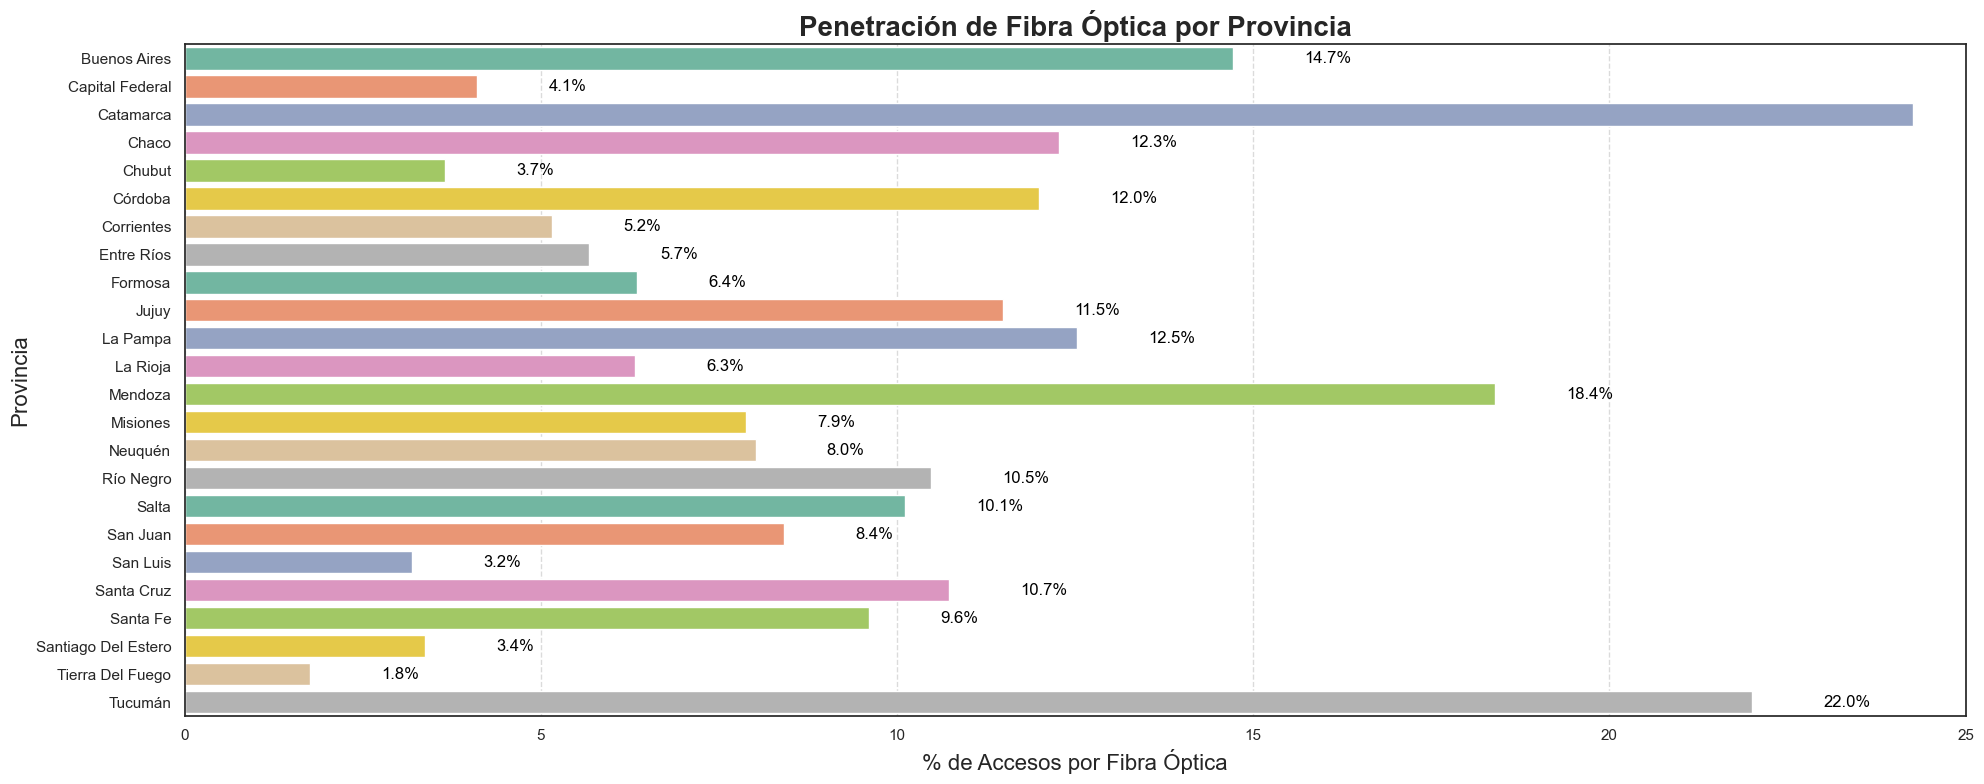

In [36]:
# Calcular el porcentaje de accesos por Fibra Óptica respecto al total por provincia
df_accesos_por_tecnologia['% Fibra Óptica'] = (df_accesos_por_tecnologia['Fibra óptica'] / df_accesos_por_tecnologia['Total']) * 100

# Crear el gráfico de la penetración de Fibra Óptica
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='% Fibra Óptica', y='Provincia', data=df_accesos_por_tecnologia, 
                 palette='Set2', hue='Provincia', errorbar=None)

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}%', 
                (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12, color='black')

# Ajustar el título y las etiquetas
plt.title('Penetración de Fibra Óptica por Provincia', fontsize=20, fontweight='bold')
plt.xlabel('% de Accesos por Fibra Óptica', fontsize=16)
plt.ylabel('Provincia', fontsize=16)

# Ajustar límites del eje x a un máximo de 25
plt.xlim(0, 25)

# Eliminar la leyenda ya que no se usa 'hue' para colores diferentes
plt.legend([],[], frameon=False)  # Esto elimina la leyenda

# Ajustar el layout
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje x
plt.show()

#### Análisis de penetracion de la fibra optica en las Provincias


* Baja Penetracion en Provincias del Norte: Provincias como Tucumán y Santiago del Estero tienen una penetración de fibra optica muy baja, lo que sugiere una oportunidad significativa para expandir la infraestructura en estas areas.

* Oportunidad en Provincias Intermedias: Provincias como Mendoza y Córdoba tienen una penetración moderada, lo que indica que hay espacio para mejorar la oferta de fibra optica y captar más usuarios.

* Liderazgo de Buenos Aires y Capital Federal: Estas provincias muestran la mayor penetración de fibra optica, lo que indica una infraestructura sólida y una alta demanda de servicios de internet de alta velocidad.

* Potencial de Crecimiento en el Mercado: La baja penetración en muchas provincias sugiere un mercado en crecimiento para proveedores de servicios de internet, especialmente en la promoción de fibra optica como una solución superior a tecnologias más antiguas.

- Estrategias sugeridas:

* Campañas de Concientizacion: Desarrollar campañas de marketing que eduquen a los consumidores sobre los beneficios de la fibra optica, especialmente en provincias con menor acceso, para fomentar la adopcion.

* Paquetes Especiales para Empresas: Ofrecer paquetes de servicios de fibra optica a empresas en provincias intermedias, destacando la importancia de una conexión rápida y estable para el crecimiento de los negocios.

* Alianzas Estratégicas: Formar alianzas con gobiernos locales y organizaciones comunitarias para facilitar la expansión de la fibra optica y mejorar la conectividad en áreas desatendidas.

#### - Tendencias a lo Largo del Tiempo

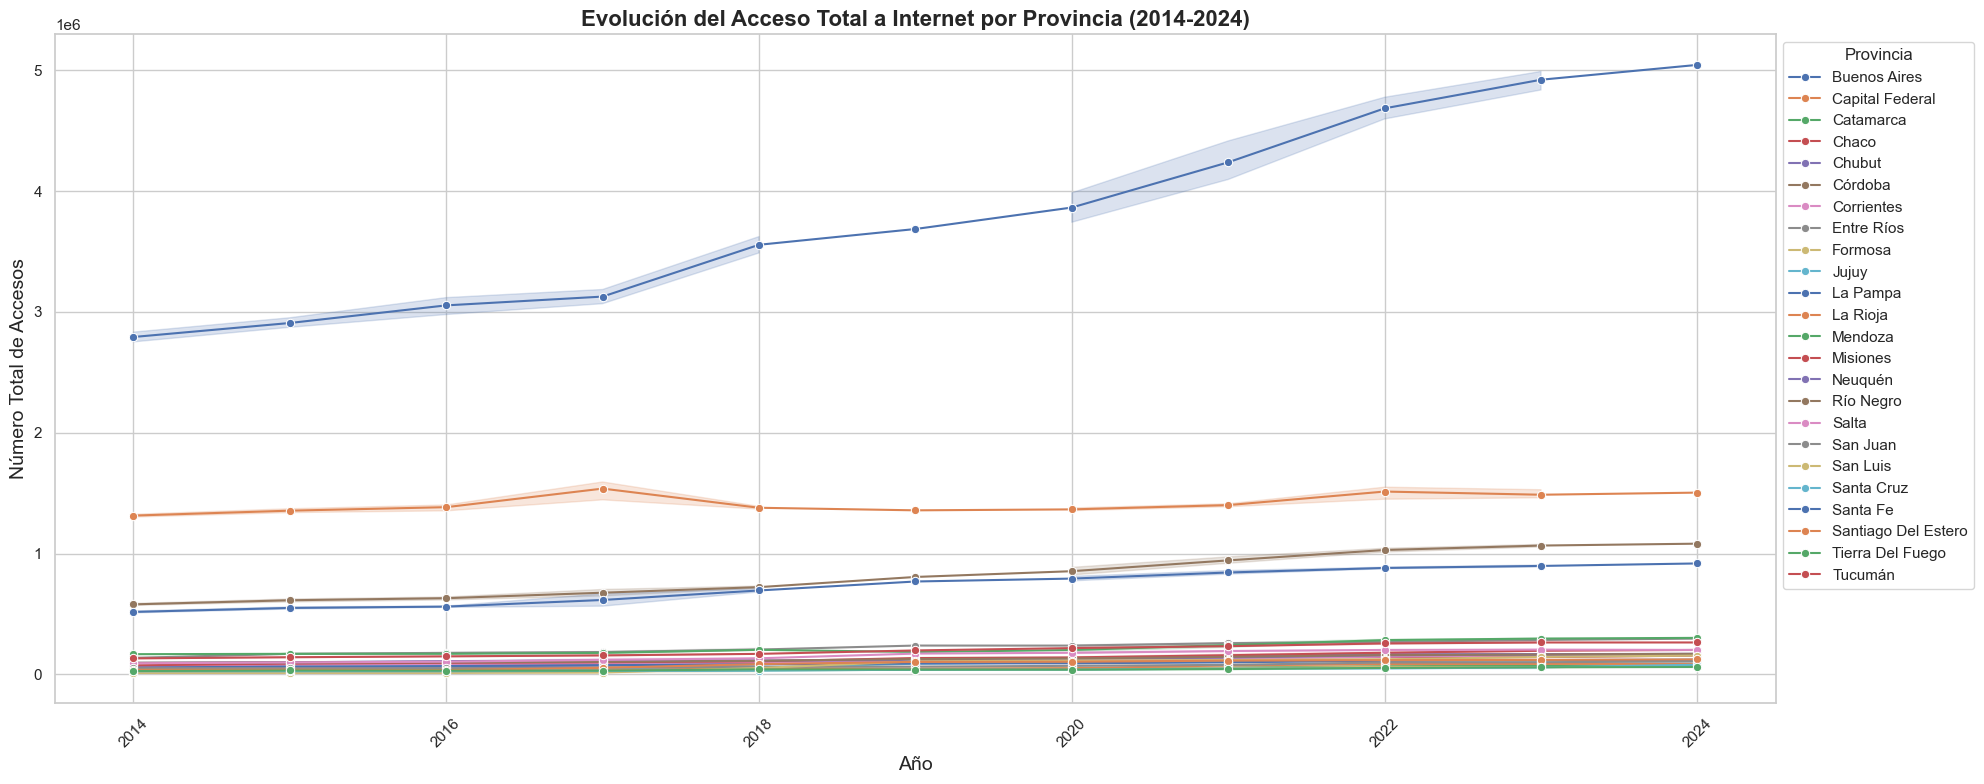

In [37]:
# Configuro el tamaño y el estilo del grafico
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

# Creo un grafico para ver la evolucion del acceso en cada provincia
for provincia in df_accesos_por_tecnologia['Provincia'].unique():
    sns.lineplot(data=df_accesos_por_tecnologia[df_accesos_por_tecnologia['Provincia'] == provincia], 
                 x='Año', y='Total', label=provincia, marker='o')

# Realizo las configuraciondes del titulo y los ejes del grafico
plt.title('Evolución del Acceso Total a Internet por Provincia (2014-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número Total de Accesos', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Provincia', bbox_to_anchor=(1, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.grid(True)  # Añado na cuadrícula
plt.tight_layout()  # Ajusto el layout
plt.show() # Muestro el grafico

### - Identificación de Provincias con Baja Conectividad

Umbral para bajo acceso con outliers: 14131744.40


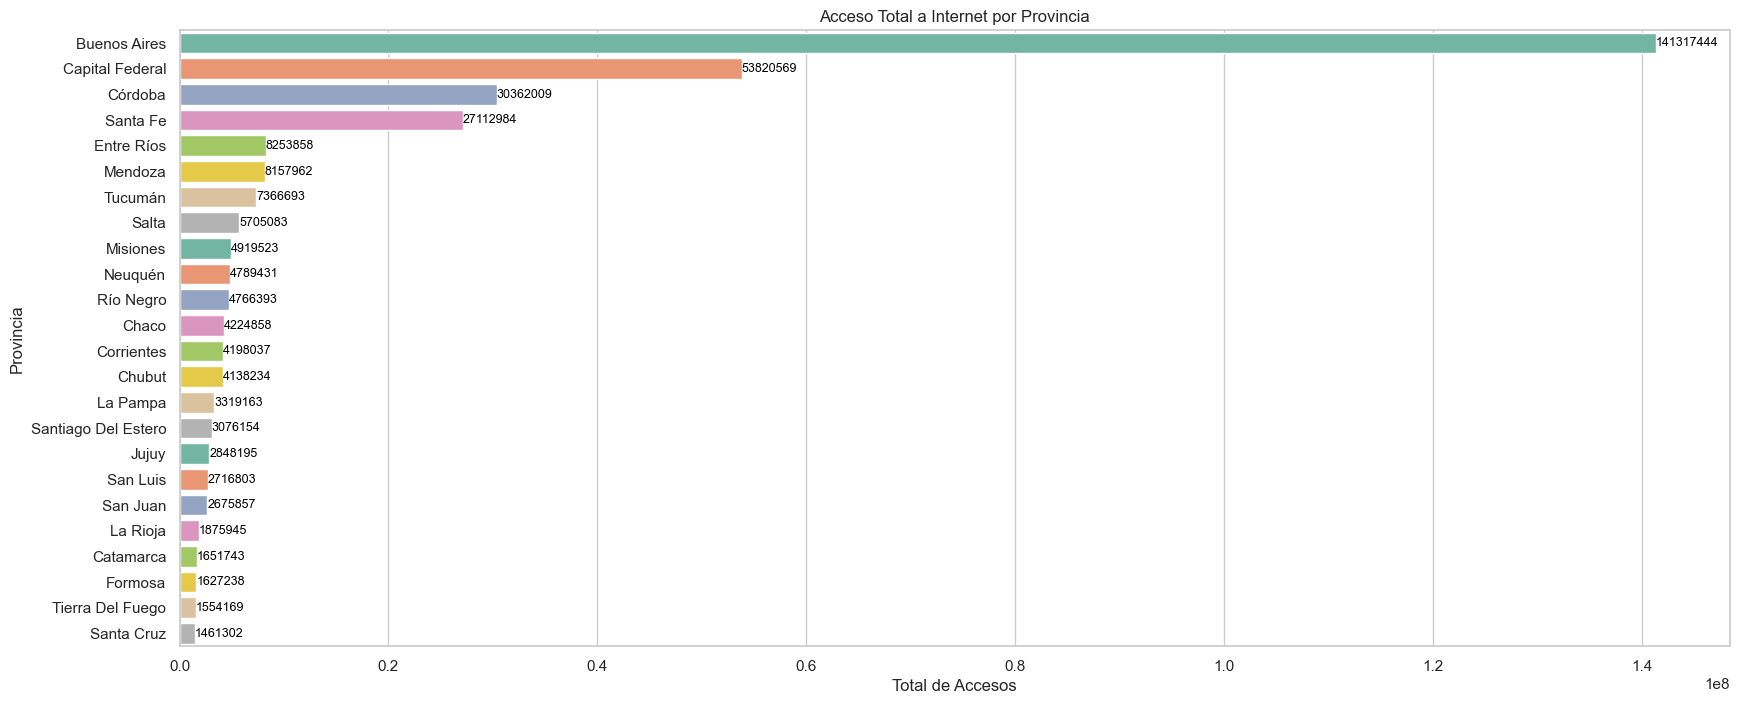

In [38]:
# Sumo los accesos por provincia
acceso_por_provincia = df_accesos_por_tecnologia.groupby('Provincia')['Total'].sum().reset_index()

# Calculo el acceso mínimo, máximo y la media
acceso_minimo = acceso_por_provincia['Total'].min()
acceso_maximo = acceso_por_provincia['Total'].max()
acceso_media = acceso_por_provincia['Total'].mean()

# Defino un umbral bajo
umbral_bajo_acceso = 0.10 * acceso_maximo  # 10% del acceso máximo
print(f"Umbral para bajo acceso con outliers: {umbral_bajo_acceso:.2f}")

# Ordeno el DataFrame por Total en orden descendente
acceso_por_provincia = acceso_por_provincia.sort_values(by='Total', ascending=False)

# Creo el gráfico de barras
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Total', y='Provincia', data=acceso_por_provincia, palette='Set2', hue='Provincia', legend=False)
plt.title('Acceso Total a Internet por Provincia')
plt.xlabel('Total de Accesos')
plt.ylabel('Provincia')

# Agrego etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 2000, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=9, color='black')

# Muestro el grafico
plt.show()

#### Analisis de las provincias con baja conectividad

* Provincias con Baja Conectividad:
Tierra del Fuego, Santa cruz, Formosa, Catamarca, La rioja, San juan.

* Observación General: El grafico revela una notable disparidad en el acceso a internet por provincia. Buenos Aires y Capital Federal destacan por su alta conectividad, mientras que otras provincias muestran cifras significativamente mas bajas.

-Factores que Influyen en la Baja Conectividad:

* Densidad Poblacional: Menor densidad suele correlacionarse con escasa infraestructura de telecomunicaciones.
* Desarrollo Economico: Provincias menos desarrolladas tienden a recibir menor inversion en infraestructura.
* Geografia: Terrenos dificiles de acceder complican el despliegue de redes.
* Políticas Publicas: La regulación gubernamental impacta en la disponibilidad y costo del servicio.

-Conclusiones:

* Oportunidades de Crecimiento: Las provincias con baja conectividad presentan un mercado potencial para la expansión de servicios.
* Necesidad de Inversión: Se requieren inversiones significativas en infraestructura para mejorar la conectividad.
* Diseño de Productos Adaptados: Es vital desarrollar ofertas que consideren las necesidades y capacidades de pago de los usuarios.
* Colaboración con el Gobierno: Trabajar con autoridades locales es clave para superar barreras regulatorias y logisticas.
* Este analisis sugiere que hay un gran potencial de mercado en las provincias con baja conectividad, lo que puede traducirse en oportunidades de negocio y desarrollo.

### - Verificación de Outliers
* Observaciones Iniciales: Tras analizar los graficos de accesos por provincia, he notado un desfase significativo en los datos de accesos. Este desfase puede atribuirse a la cantidad de población en cada provincia, la cual no se está tomando en cuenta en los análisis actuales.

* Importancia de la Población: Es fundamental considerar la población de cada provincia al evaluar los accesos a internet. Sin esta consideración, los datos pueden llevar a interpretaciones erroneas sobre la disponibilidad del servicio en distintas regiones.

* Plan de Acción: Para abordar esta problematica, procedere a verificar los outliers en los datos de accesos. Mi enfoque sera calcular la proporción de accesos en relacion con la poblacion de cada provincia. De esta manera, podre identificar y corregir las anomalias, asegurando que los analisis reflejen una representacion mas precisa de la realidad en cada provincia.

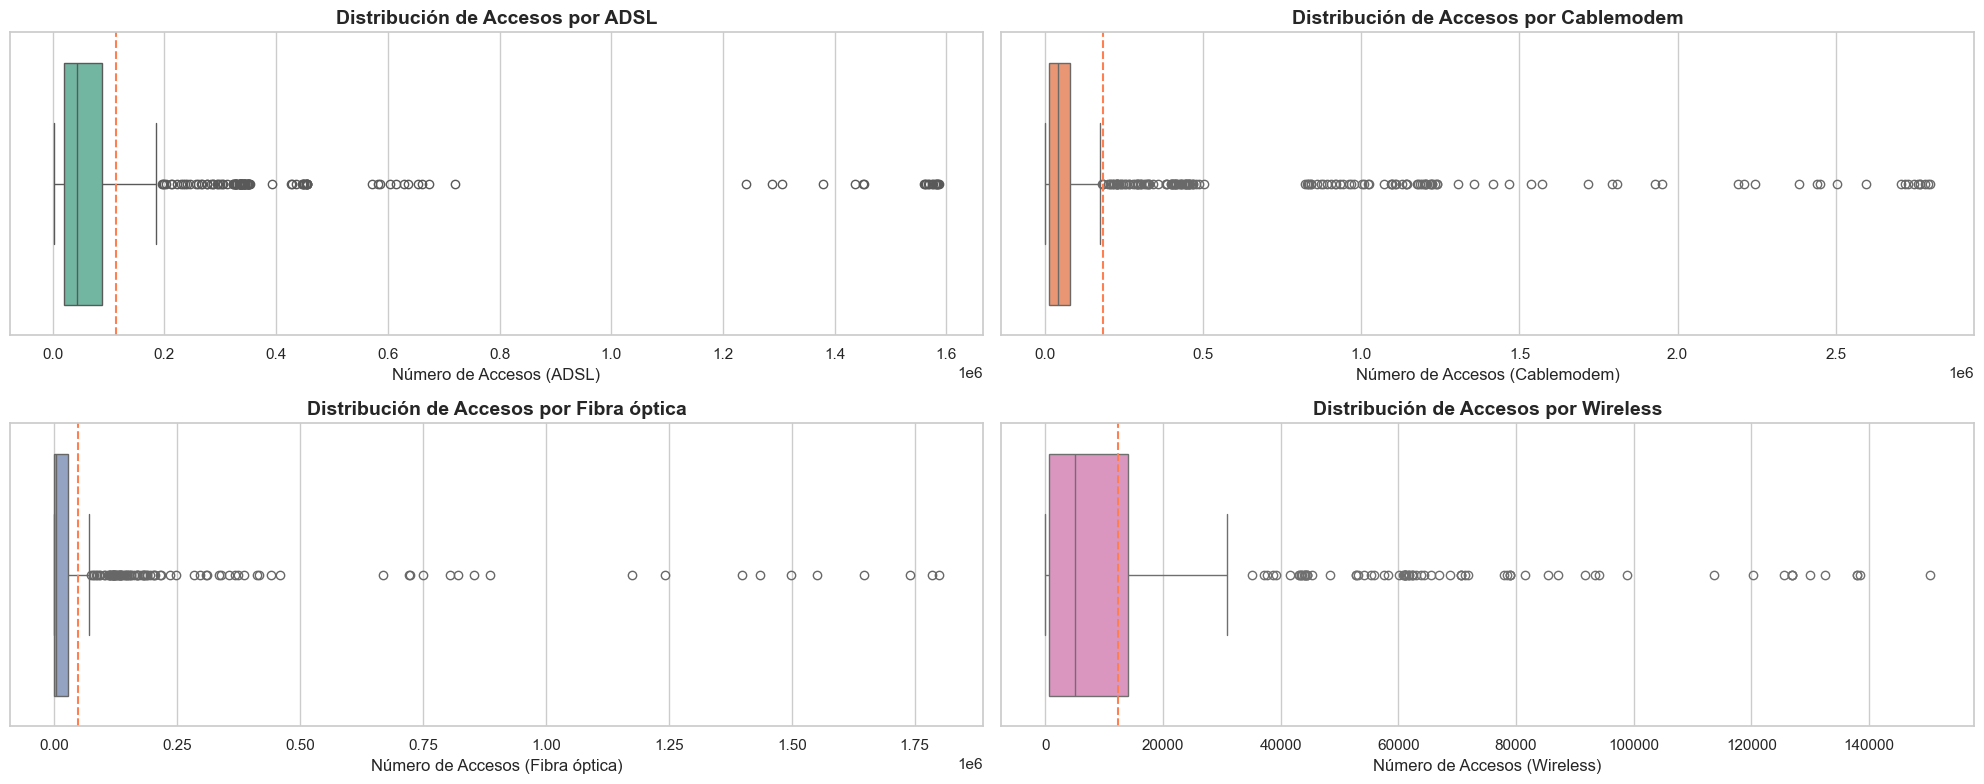

In [39]:
# Defino el tamaño del grafico
plt.figure(figsize=(20, 8))

# Defino la paleta de colores
colors = sns.color_palette('Set2')

# Tomo las tecnologias a graficar
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']

# Uso un boxplot para cada tecnologia
for i, tecnologia in enumerate(tecnologias):
    plt.subplot(2, 2, i + 1)  # Crear una subgráfica para cada tecnología
    box = sns.boxplot(x=df_accesos_por_tecnologia[tecnologia], color=colors[i]) 
    
    # Configuro el titulo y las etiquetas
    plt.title(f'Distribución de Accesos por {tecnologia}', fontsize=14, fontweight='bold')
    plt.xlabel(f'Número de Accesos ({tecnologia})', fontsize=12)
    
    # Añado una línea para la media obteniendo una mejor visualizacion
    media = df_accesos_por_tecnologia[tecnologia].mean()
    plt.axvline(media, color='coral', linestyle='--', label=f'median: {media:.0f}')
    


# Ajusto el layout para evitar superposiciones
plt.tight_layout()

# Muestro el grafico
plt.show()

### Analisis de outliers

* Los outliers indican una gran variabilidad en la distribución de los accesos a internet entre las diferentes provincias.
* Los outliers pueden sesgar los resultados de los análisis estadisticos, como la media y la desviacion estandar.
* Es posible que los outliers sean un sesgo debido al conteo total sin tener en cuenta la poblacion.

In [40]:
# Creo un Dataframe nuevo para realizar la comparativa al corregir los outliers

# Filtro y agrupo los accesos por provincia y tecnología
accesos_por_provincia = df_accesos_por_tecnologia.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica','Otros', 'Wireless', 'Total']].sum().reset_index()

# Uno los datos de accesos con la poblacion
df_unido = pd.merge(accesos_por_provincia, df_poblacion_por_provincia, on='Provincia', how='left')

# Calculo la proporcion de accesos por poblacion
df_unido['Proporción'] = df_unido['Total'] / df_unido['Total_poblacion']

# Filtro los outliers basados en la proporcion y Defino un umbral para identificar outliers usando el percentil 95
umbral_outlier = df_unido['Proporción'].quantile(0.95)

# Filtro las provincias que estan por debajo del umbral
df_accesos_totales_sin_outliers = df_unido[df_unido['Proporción'] < umbral_outlier].copy()

# Reinicio el indice del DataFrame resultante
df_accesos_totales_sin_outliers.reset_index(drop=True, inplace=True)

# Muestro el dataframe resultante
print("Datos de accesos totales sin outliers:")
df_accesos_totales_sin_outliers.head()

Datos de accesos totales sin outliers:


,Provincia,ADSL,Cablemodem,Fibra óptica,Otros,Wireless,Total,Total_poblacion,Proporción
0,Buenos Aires,38255033.0,74494554.0,24135336.0,1681377.0,2751144.0,141317444.0,35138106,4.021772
1,Catamarca,808338.0,184834.0,594700.0,45354.0,18517.0,1651743.0,429556,3.845233
2,Chaco,1681863.0,1678268.0,660129.0,56909.0,147689.0,4224858.0,1142963,3.696408
3,Chubut,1724368.0,1143846.0,200148.0,339013.0,730859.0,4138234.0,603120,6.861378
4,Corrientes,1814732.0,1840065.0,291766.0,95246.0,156228.0,4198037.0,1197553,3.505512


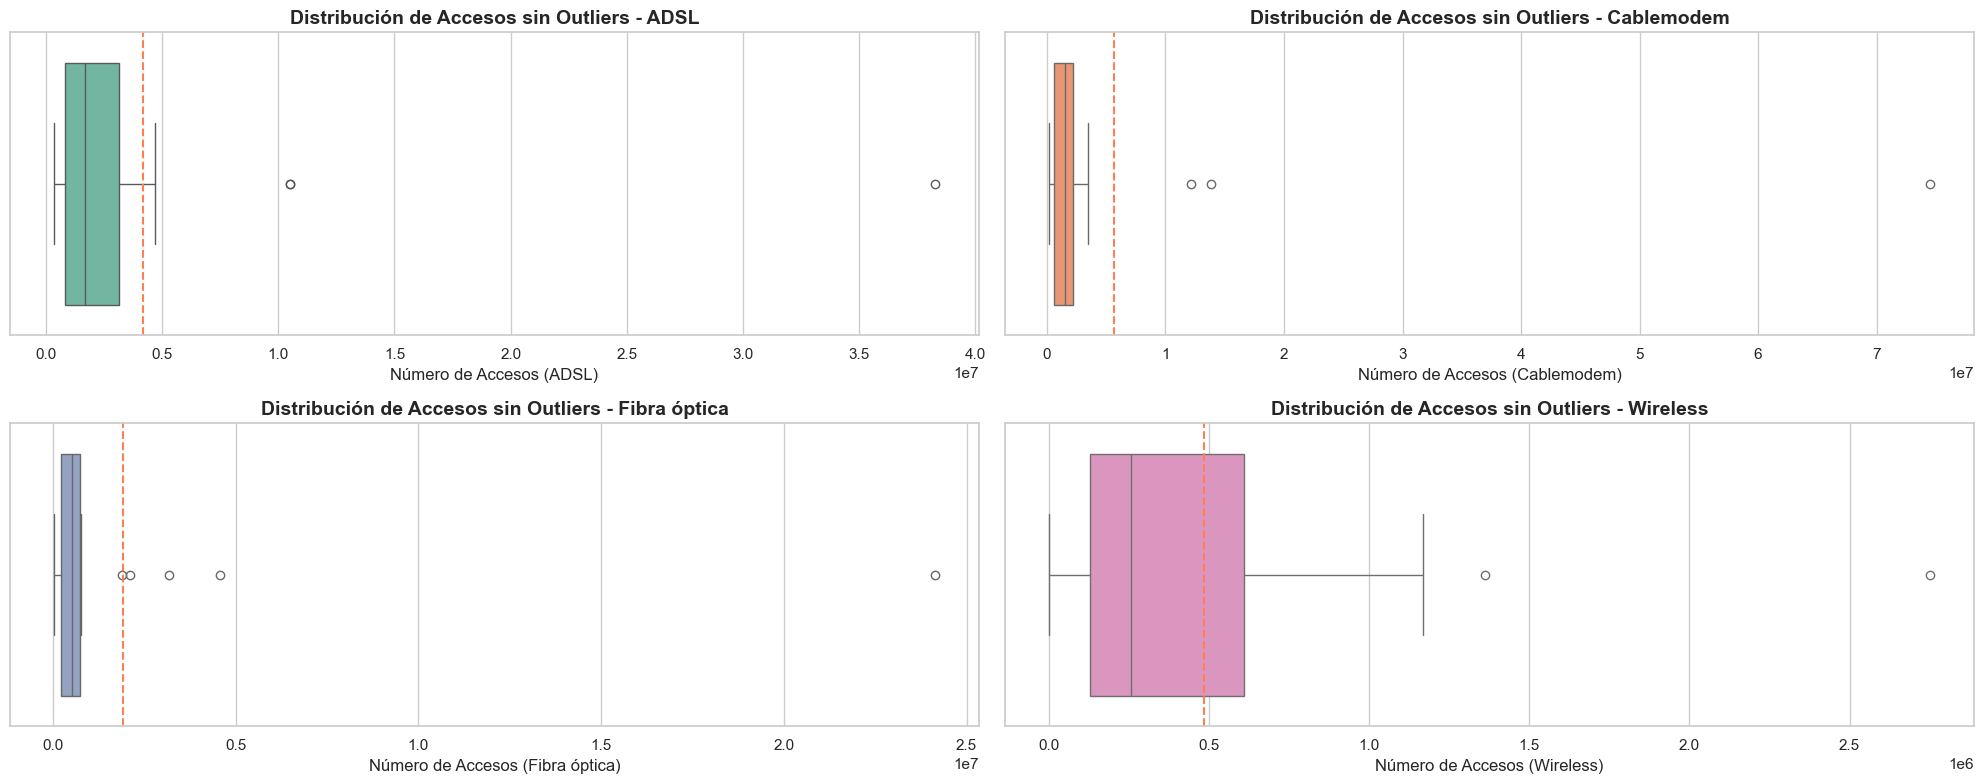

In [41]:
# Defino el tamaño del grafico
plt.figure(figsize=(20, 8))

# Defino la paleta de colores
colors = sns.color_palette('Set2')

# Tomo las tecnologias a graficar
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']

# Uso un boxplot para cada tecnologia en el DataFrame sin outliers
for i, tecnologia in enumerate(tecnologias):
    plt.subplot(2, 2, i + 1) 
    box = sns.boxplot(x=df_accesos_totales_sin_outliers[tecnologia], color=colors[i])
    
    # Configuro el titulo y las etiquetas
    plt.title(f'Distribución de Accesos sin Outliers - {tecnologia}', fontsize=14, fontweight='bold')
    plt.xlabel(f'Número de Accesos ({tecnologia})', fontsize=12)
    
    # Añado una linea para la media
    media = df_accesos_totales_sin_outliers[tecnologia].mean()
    plt.axvline(media, color='coral', linestyle='--', label=f'Media: {media:.0f}')
    

# Ajusto el layout para evitar superposiciones
plt.tight_layout()

# Muestro la figura
plt.show()

In [42]:
# Calculo los outliers que me quedan de cada tecnologia
for tecnologia in tecnologias:
    # Calculo los limites para detectar outliers
    Q1 = df_accesos_totales_sin_outliers[tecnologia].quantile(0.25)
    Q3 = df_accesos_totales_sin_outliers[tecnologia].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtro los outliers
    outliers = df_accesos_totales_sin_outliers[(df_accesos_totales_sin_outliers[tecnologia] < limite_inferior) | 
                                                (df_accesos_totales_sin_outliers[tecnologia] > limite_superior)]
    
    # Muestro los outliers junto con las provincias
    print(f"Outliers para {tecnologia}:")
    for index, row in outliers.iterrows():
        print(f"Provincia: {row['Provincia']}, Valor: {row[tecnologia]}")

Outliers para ADSL:
Provincia: Buenos Aires, Valor: 38255033.0
Provincia: Córdoba, Valor: 10527261.0
Provincia: Santa Fe, Valor: 10485342.0
Outliers para Cablemodem:
Provincia: Buenos Aires, Valor: 74494554.0
Provincia: Córdoba, Valor: 13808488.0
Provincia: Santa Fe, Valor: 12119508.0
Outliers para Fibra óptica:
Provincia: Buenos Aires, Valor: 24135336.0
Provincia: Córdoba, Valor: 4578036.0
Provincia: Mendoza, Valor: 1893438.0
Provincia: Santa Fe, Valor: 3172698.0
Provincia: Tucumán, Valor: 2097965.0
Outliers para Wireless:
Provincia: Buenos Aires, Valor: 2751144.0
Provincia: San Luis, Valor: 1363703.0


### Analisis de correccion de outliers

* Al aplicar la proporción de la población a los datos originales, busque normalizar los valores y reducir la influencia de los outliers. Esto permitio obtener una vision mas clara de la distribucion de los accesos a internet por tecnologia y provincia, y mitigo el impacto de aquellos valores atipicos que estaban sesgando los resultados.

* Al observar las nuevas cajas se pudo observar que aun se conservaban algunos outliers se confirmaron las provincias y los totales, al revisarlos mas detalladamente he decidido dejarlos ya que estas provincias donde se presentan tienen una poblacion mayor por lo tanto es posible que existiera un aumento en la infraestructura o en la inversion en general de tecnologias.

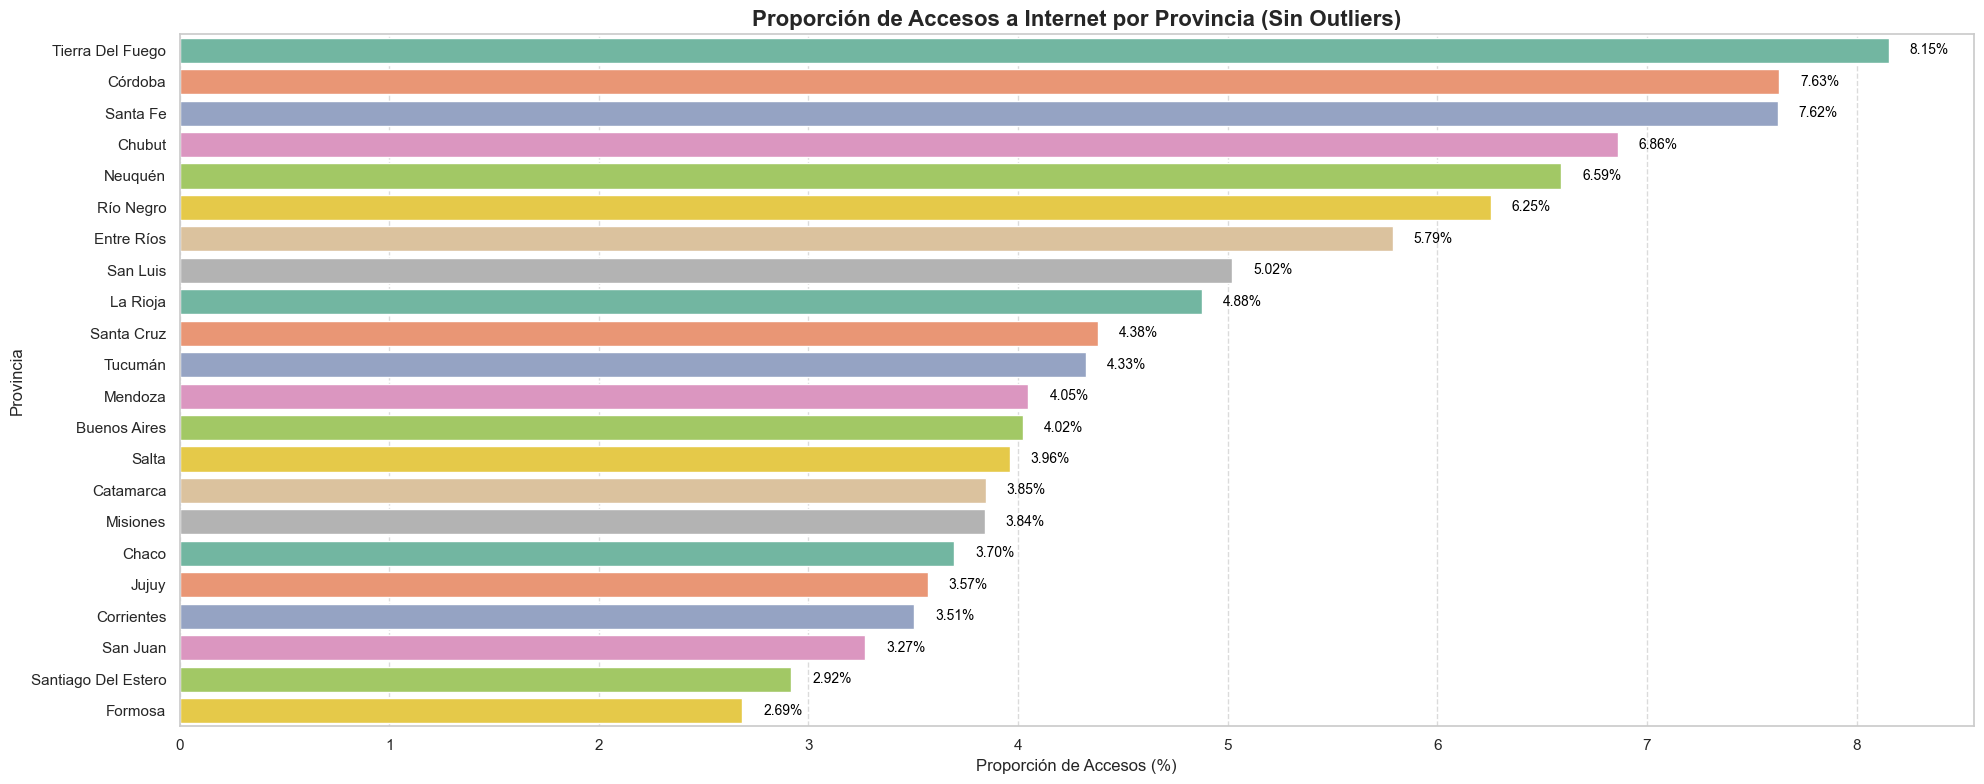

In [43]:
# Defino el tamaño del grafico
plt.figure(figsize=(20, 8))

# Ordeno el DataFrame por la columna 'Proporción' en orden descendente
df_ordenado = df_accesos_totales_sin_outliers.sort_values(by='Proporción', ascending=False)

# Creo un grafico de barras que muestra la proporción de accesos a internet por provincia
barplot = sns.barplot(x='Proporción', y='Provincia', data=df_ordenado, palette='Set2', hue='Provincia')

# Establezco el titulo del grafico
plt.title('Proporción de Accesos a Internet por Provincia (Sin Outliers)', fontsize=16, fontweight='bold')

# Añado las Etiquetas de los ejes
plt.xlabel('Proporción de Accesos (%)', fontsize=12)
plt.ylabel('Provincia', fontsize=12)

# Añado las etiquetas de valor a las barras
for p in barplot.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}%', 
             ha='left', va='center', fontsize=10, color='black')

# Añado la cuadrícula solo al eje X para una mejor visualización
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajusto el layout para evitar superposiciones
plt.tight_layout()

# Muestro el gráfico
plt.show()

### Analisis del acceso a internet segun la proporcion de poblacion

* Ascenso de provincias: Observamos que provincias como Tierra del Fuego, Santa Cruz y otras que inicialmente presentaban los valores más bajos, han escalado posiciones en el ranking. Esto sugiere que al eliminar los outliers, se ha obtenido una visión más precisa de la situación real de la conectividad en estas regiones.

* Descenso de provincias: Por otro lado, provincias como Buenos Aires, Córdoba y Santa Fe, que inicialmente lideraban el ranking, pueden haber experimentado un ligero descenso en su posición relativa. Esto podría indicar que la alta concentración de accesos en estas provincias estaba siendo influenciada por su alta poblacion.

* La eliminación de los outliers ha contribuido a reducir la brecha digital aparente entre las provincias. Al eliminar los valores extremos, se obtiene una distribución de datos más homogénea, lo que sugiere que la conectividad en las provincias está más equilibrada de lo que inicialmente se pensaba.

* Este análisis resalta la importancia de identificar y corregir los outliers en los datos. Los outliers pueden distorsionar significativamente los resultados y llevar a conclusiones erroneas. Al corregirlos, se obtiene una imagen mas precisa de la realidad.

## Analisis de la hoja 'df_penetracion_poblacion'

In [44]:
# Observo la estructura del dataset
df_penetracion_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [45]:
# Observo algunos datos para tener una idea sobre la informacion
df_penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


In [46]:
# Sumo los valores faltantes por columna
valores_faltantes = df_penetracion_poblacion.isnull().sum()
print(valores_faltantes)

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64


In [47]:
# Cuento los registros duplicados
duplicados = df_penetracion_poblacion.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 0


### Identificación de provincias con bajo acceso

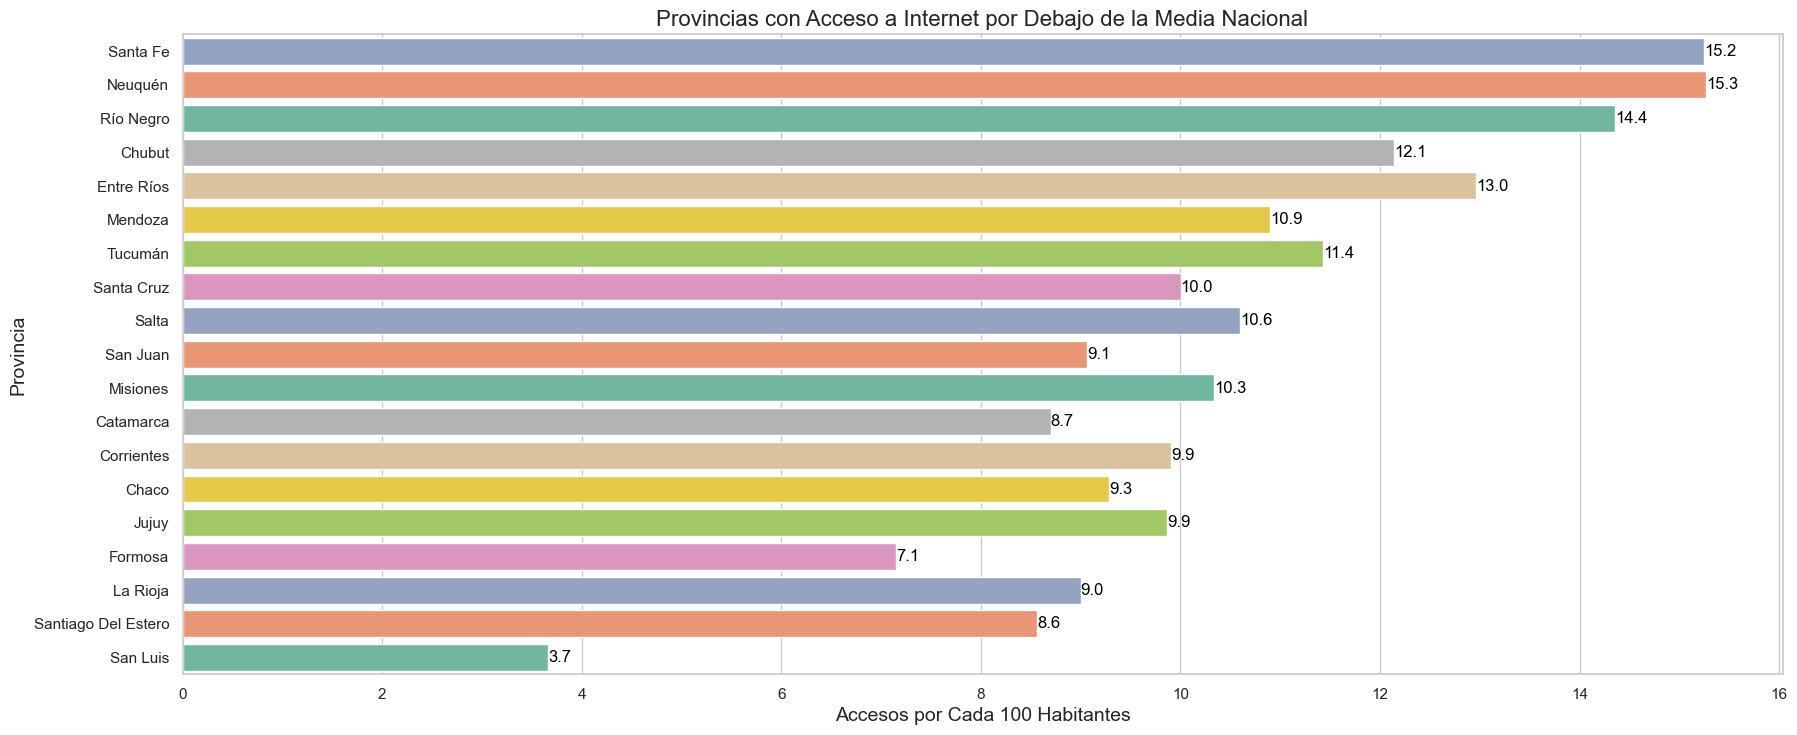

In [48]:
# Calculo la media de accesos a internet por cada 100 habitantes
acceso_media = df_penetracion_poblacion['Accesos por cada 100 hab'].mean()

# Filtro las provincias con acceso por debajo de la media
provincias_bajo_acceso = df_penetracion_poblacion[df_penetracion_poblacion['Accesos por cada 100 hab'] < acceso_media]

# Me aseguro de que la columna es numerica usando .loc
provincias_bajo_acceso.loc[:, 'Accesos por cada 100 hab'] = pd.to_numeric(provincias_bajo_acceso['Accesos por cada 100 hab'], errors='coerce')

# Ordeno el DataFrame por 'Accesos por cada 100 hab'
provincias_bajo_acceso = provincias_bajo_acceso.sort_values(by='Accesos por cada 100 hab', ascending=True)

# Defino el tamaño del grafico
plt.figure(figsize=(20, 8))

# Creo el grafico de barras
ax = sns.barplot(x='Accesos por cada 100 hab', y='Provincia', data=provincias_bajo_acceso, hue='Provincia', palette='Set2', legend=False,errorbar=None)

# Personalizo el título y los ejes
plt.title('Provincias con Acceso a Internet por Debajo de la Media Nacional', fontsize=16)
plt.xlabel('Accesos por Cada 100 Habitantes', fontsize=14)
plt.ylabel('Provincia', fontsize=14)

# Agrego las etiquetas de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', color='black', fontsize=12)

# Intento ordenar la distribucion
plt.gca().invert_yaxis()

# Ajusto el layout para evitar superposiciones
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Muestro el grafico
plt.show()

#### Analisis de las provincias con accesos por debajo de la media

Provincias con Menor Acceso:
- San Luis presenta el acceso más bajo, con solo 3.7 accesos por cada 100 habitantes. Esto sugiere que esta provincia enfrenta limitaciones significativas en infraestructura de telecomunicaciones o falta de inversión.
- Formosa y Santiago del Estero también tienen accesos bajos, lo que refuerza la idea de que existen regiones en el país donde la conectividad es insuficiente para satisfacer las necesidades de la población.

Necesidad de Inversión:
* Las provincias con menor acceso, como San Luis, Formosa y Santiago del Estero, necesitan inversiones en infraestructura de telecomunicaciones. Mejorar la conectividad podría tener efectos positivos en la economía local, acceso a servicios digitales, educación a distancia y oportunidades laborales, como el teletrabajo.

Desigualdad Regional:
* La disparidad en el acceso a Internet subraya una desigualdad estructural entre las regiones de Argentina. Las provincias más ricas o urbanizadas tienen mejor infraestructura tecnológica, mientras que las más remotas o rurales sufren de conectividad insuficiente, creando una brecha digital.
Esta desigualdad también puede afectar la capacidad de estas regiones para competir en el mercado digital y aprovechar los beneficios del comercio electrónico y otras plataformas tecnológicas.

Oportunidades de Desarrollo:
* Las provincias con bajo acceso a Internet pueden representar áreas clave para el desarrollo de proyectos de infraestructura. Empresas de telecomunicaciones y tecnología pueden identificar estas zonas como mercados emergentes donde invertir en tecnologías como la fibra óptica, mejorar las velocidades de conexión, o expandir el acceso a redes de alta capacidad.
Además, alianzas público-privadas podrían ser una solución efectiva para canalizar inversiones en regiones donde los costos son más altos debido a dificultades geográficas.

* Prioridades de Inversión:
Las provincias con acceso por debajo de la media nacional deben ser prioritarias en los planes de desarrollo e inversión en infraestructura de Internet.
En las zonas donde el despliegue de infraestructura es complejo o costoso (como en áreas rurales o de difícil acceso), tecnologías alternativas como Wireless pueden ser una solución efectiva para reducir las barreras de conectividad y aumentar la cobertura.

Recomendaciones estrategicas:
* Desarrollo de Planes: Crear planes específicos para mejorar la infraestructura de Internet en las provincias con menor conectividad.
* Foco en Tecnologias Alternativas: Considerar el uso de tecnologías como el Wireless en áreas donde la implementación de fibra óptica sea compleja o costosa.
* Alianzas Público-Privadas: Impulsar asociaciones con el sector privado para financiar y acelerar los proyectos de expansión de Internet en las zonas menos conectadas.

###  Tendencia temporal de crecimiento o disminución de accesos

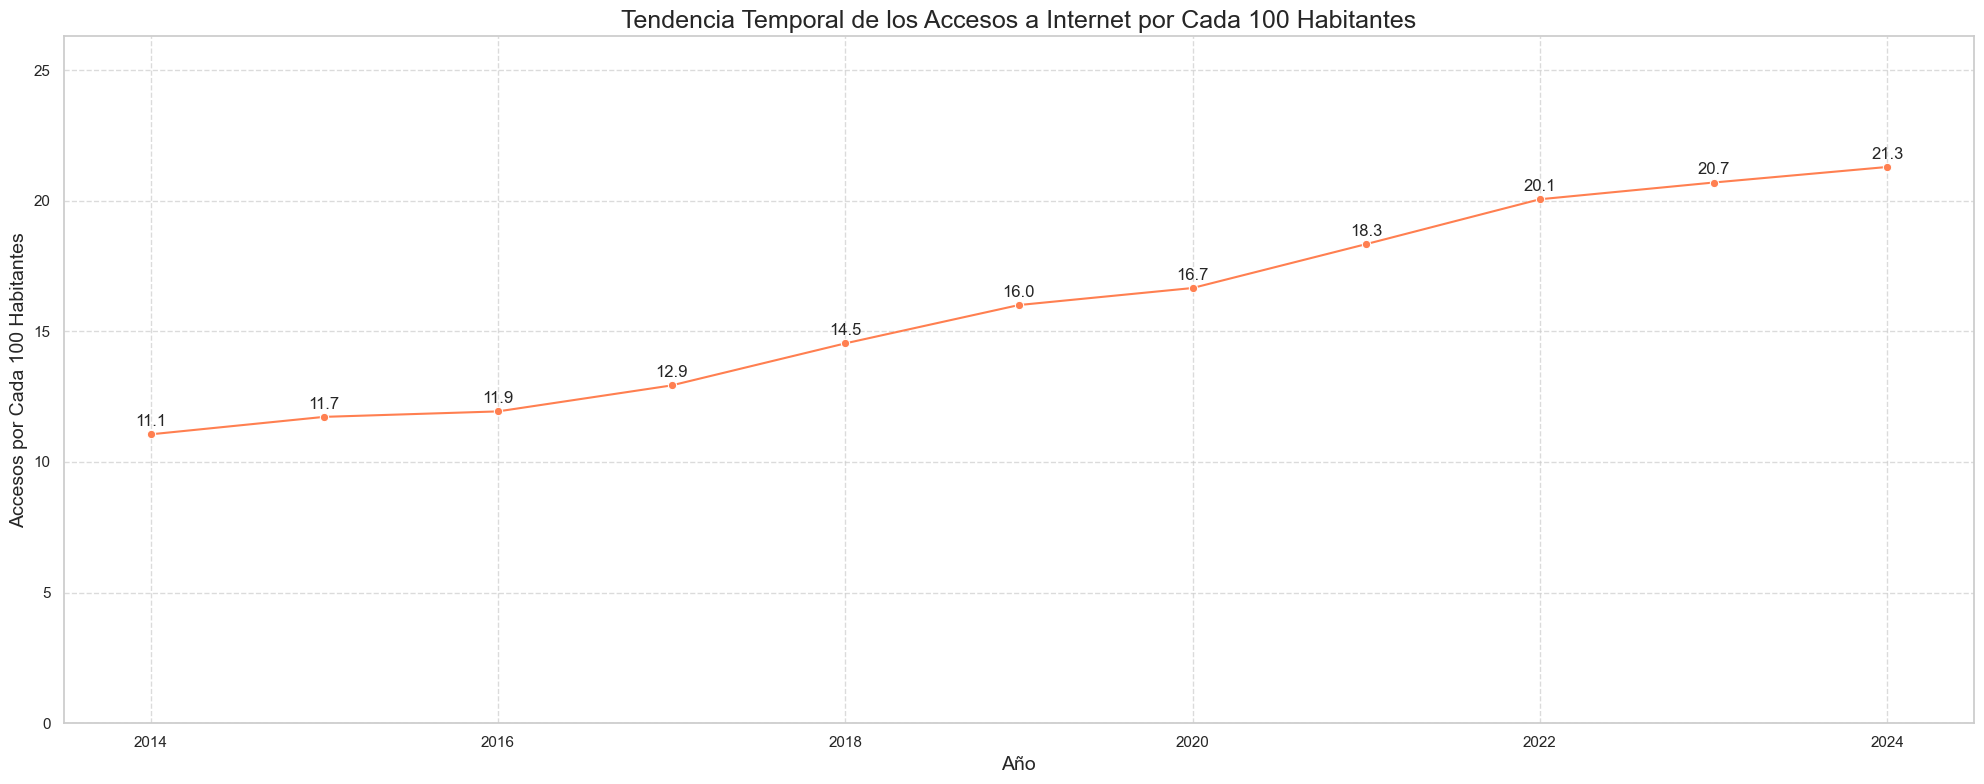

In [49]:
# Agrupo los datos para calcular la media de accesos por año
tendencia_accesos = df_penetracion_poblacion.groupby('Año')['Accesos por cada 100 hab'].mean().reset_index()

# Defino el estilo de Seaborn
sns.set(style='whitegrid')

# Defino el tamaño de la figura
plt.figure(figsize=(20, 8))

# Creo el grafico de linea
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=tendencia_accesos, marker='o', color='coral')

# Personalizo el título y los ejes
plt.title('Tendencia Temporal de los Accesos a Internet por Cada 100 Habitantes', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Accesos por Cada 100 Habitantes', fontsize=14)

# Ajusto los limites del eje y para mejor visualizacion
plt.ylim(0, tendencia_accesos['Accesos por cada 100 hab'].max() + 5)

# Agrego una cuadricula
plt.grid(True, linestyle='--', alpha=0.7)

# Agrego etiquetas a los puntos
for i in range(len(tendencia_accesos)):
    plt.text(tendencia_accesos['Año'][i], tendencia_accesos['Accesos por cada 100 hab'][i] + 0.2, 
             f'{tendencia_accesos["Accesos por cada 100 hab"][i]:.1f}', 
             ha='center', va='bottom', fontsize=12)

# Ajusto el layout para evitar superposiciones
plt.tight_layout()

# Muestro el grafico
plt.show()


### Analisis de la Tendencia temporal de los accesos a internet

El gráfico refleja la evolución de los accesos a Internet en Argentina desde 2014 hasta 2024, con un aumento constante en el número de accesos por cada 100 habitantes, destacando el progreso en la conectividad a nivel nacional.

Conclusiones:

* Crecimiento General:
Desde 2014 hasta 2024, se ha registrado un crecimiento sostenido en los accesos a Internet, pasando de 11.1 accesos por cada 100 habitantes en 2014 a 21.3 accesos en 2024.
Este incremento refleja un progreso significativo en la expansión de la infraestructura tecnológica y en la adopción de Internet en todo el país, lo que ha permitido una mayor inclusión digital.

* Planificación:
Es crucial desarrollar planes regionales específicos para abordar las necesidades de conectividad de cada provincia, considerando factores como su densidad de población, nivel de desarrollo económico, y sus desafíos geográficos. Las provincias con menores niveles de acceso deben ser el foco de las inversiones en tecnología para asegurar que la brecha digital entre las distintas regiones del país se reduzca.

* Monitoreo y Evaluación:
Implementar un sistema de monitoreo continuo que permita evaluar el impacto de las inversiones y políticas en la conectividad de cada provincia es esencial para medir el éxito de los proyectos y ajustar las estrategias cuando sea necesario. Este monitoreo debe incluir indicadores clave como la penetración de tecnologías avanzadas (como fibra óptica), la calidad de la conexión y el impacto económico y social de una mayor conectividad.

* Oportunidades Futuras:
El crecimiento en el acceso a Internet representa también una oportunidad de expansión para empresas de telecomunicaciones, tanto en la mejora de las tecnologías existentes como en la innovación de servicios de alta velocidad. Con un mercado en expansión, las inversiones en nuevas tecnologías como redes 5G, Internet de las Cosas (IoT) y la conectividad satelital serán cruciales para mantener el ritmo de crecimiento y atender las necesidades futuras de los usuarios.

### Analisis de la hoja 'Penetracion-hogares'

In [50]:
# Observo la estructura del dataset
df_penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [51]:
# Observo algunos datos para tener una idea sobre la informacion
df_penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [52]:
# Sumo los valores faltantes por columna
valores_faltantes = df_penetracion_hogares.isnull().sum()
print(valores_faltantes)

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64


In [53]:
# Cuento los registros duplicados
duplicados = df_penetracion_hogares.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 0


### - Comparativa entre Provincias y la Media Nacional

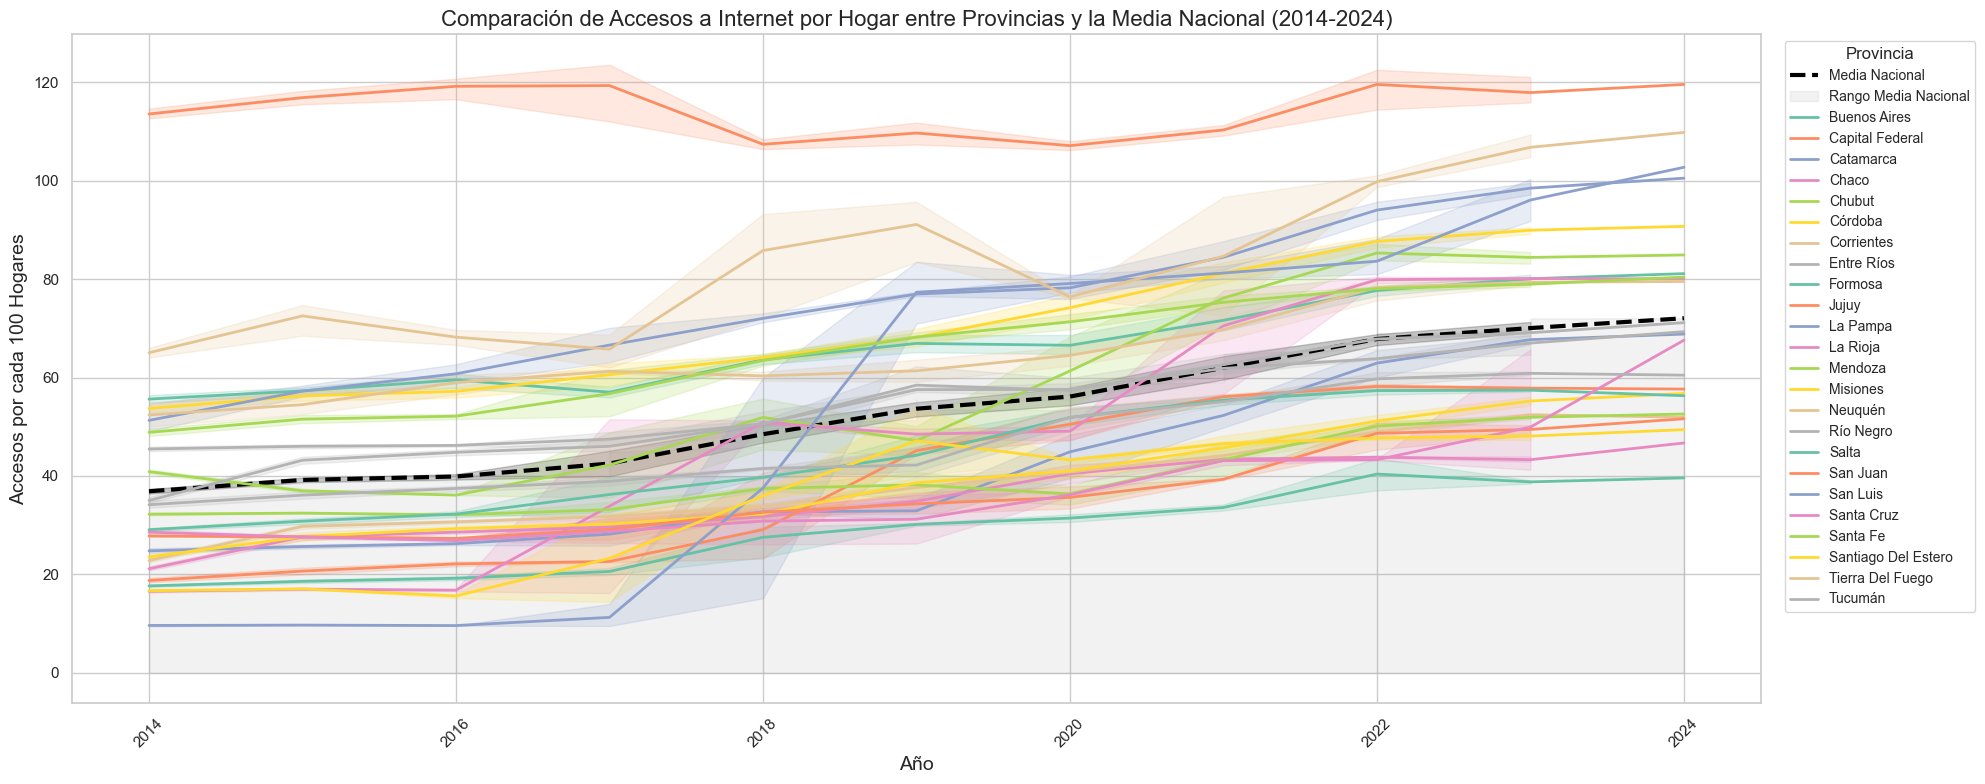

In [54]:
media_nacional = df_penetracion_hogares.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hogares'].mean().reset_index()

# Inicio la creación del gráfico y establezco el tamaño de la figura para que sea más grande y fácil de visualizar.
plt.figure(figsize=(20, 8))

# Trazo la línea de la media nacional, le doy un color negro y la hago más gruesa con un estilo de línea discontinua. Esto ayuda a que destaque.
sns.lineplot(
    x='Año', y='Accesos por cada 100 hogares', 
    data=media_nacional, label='Media Nacional', 
    color='black', linestyle='--', linewidth=3
)

# Añado un sombreado alrededor de la línea de la media nacional para resaltar el rango de esta media.
plt.fill_between(
    media_nacional['Año'], media_nacional['Accesos por cada 100 hogares'], 
    color='gray', alpha=0.1, label='Rango Media Nacional'
)

# Utilizo una paleta de colores con variedad para asignar a las provincias y asegurar que cada una sea visualmente distintiva.
provincias_colores = sns.color_palette("Set2", df_penetracion_hogares['Provincia'].nunique())

# Recorro cada provincia en mi dataframe y dibujo una línea con su respectiva información de accesos.
for i, provincia in enumerate(df_penetracion_hogares['Provincia'].unique()):
    datos_provincia = df_penetracion_hogares[df_penetracion_hogares['Provincia'] == provincia]
    # Aquí dibujo la línea para cada provincia usando un color diferente para cada una.
    sns.lineplot(
        x='Año', y='Accesos por cada 100 hogares', 
        data=datos_provincia, label=provincia, 
        color=provincias_colores[i], linewidth=2
    )

# Agrego el título del gráfico para describir claramente qué se está visualizando.
plt.title('Comparación de Accesos a Internet por Hogar entre Provincias y la Media Nacional (2014-2024)', fontsize=16)

# Etiqueto el eje X como 'Año' para que sea claro y el eje Y como 'Accesos por cada 100 Hogares'.
plt.xlabel('Año', fontsize=14)
plt.ylabel('Accesos por cada 100 Hogares', fontsize=14)

# Roto las etiquetas del eje X para que sean más fáciles de leer, especialmente si los años se superponen.
plt.xticks(rotation=45)

# Coloco la leyenda fuera del gráfico para que no interfiera con las líneas y ajusto el tamaño del texto en la leyenda.
plt.legend(title='Provincia', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=10)

# Utilizo tight_layout para asegurarme de que todos los elementos se ajusten bien dentro de la figura.
plt.tight_layout()

# Finalmente, muestro el gráfico.
plt.show()

#### Análisis de la evolucion de los accesos a internet por provincia

El gráfico muestra la comparación de accesos a Internet por hogar en diversas provincias de Argentina y la media nacional desde 2014 hasta 2024. Se observa un aumento general en los accesos, pero con notables variaciones entre provincias.

Conclusiones: 
* Crecimiento General: Ha habido un aumento en los accesos a Internet, reflejando una mejora en la conectividad nacional, aunque la tasa de crecimiento varía entre provincias.

* Desigualdad Regional: Provincias como Buenos Aires y Santa Fe tienen un acceso significativamente mayor en comparación con San Luis y Formosa, evidenciando disparidades en la infraestructura de telecomunicaciones.

* Referencia de Media Nacional: La media nacional actúa como un punto de referencia; muchas provincias están por debajo de esta media, indicando que aún se requiere mejorar el acceso equitativo.

* Variabilidad Provincial: Las trayectorias de acceso a Internet entre provincias son distintas, sugiriendo que las políticas locales e inversiones en infraestructura han influido en la mejora del acceso.

* Impacto de la Inversión: Provincias que han invertido en infraestructura de telecomunicaciones muestran un crecimiento más sólido, destacando la inversión como un factor clave para mejorar la conectividad.

Recomendaciones: 
* Priorizar Inversiones: Es esencial que las provincias con menor acceso reciban atención prioritaria en inversiones para cerrar la brecha digital.

* Desarrollo de Políticas: Las políticas públicas deben enfocarse en fomentar la infraestructura tecnológica en provincias rezagadas, considerando sus necesidades específicas.

* Fomento de Alianzas: La colaboración entre el sector público y privado es fundamental para acelerar la expansión de la conectividad en áreas con acceso limitado.

* Educación Digital: Además de mejorar la infraestructura, es crucial implementar programas de educación y concienciación sobre el uso de Internet para maximizar sus beneficios en las comunidades.

### - Análisis de Variación por Trimestre

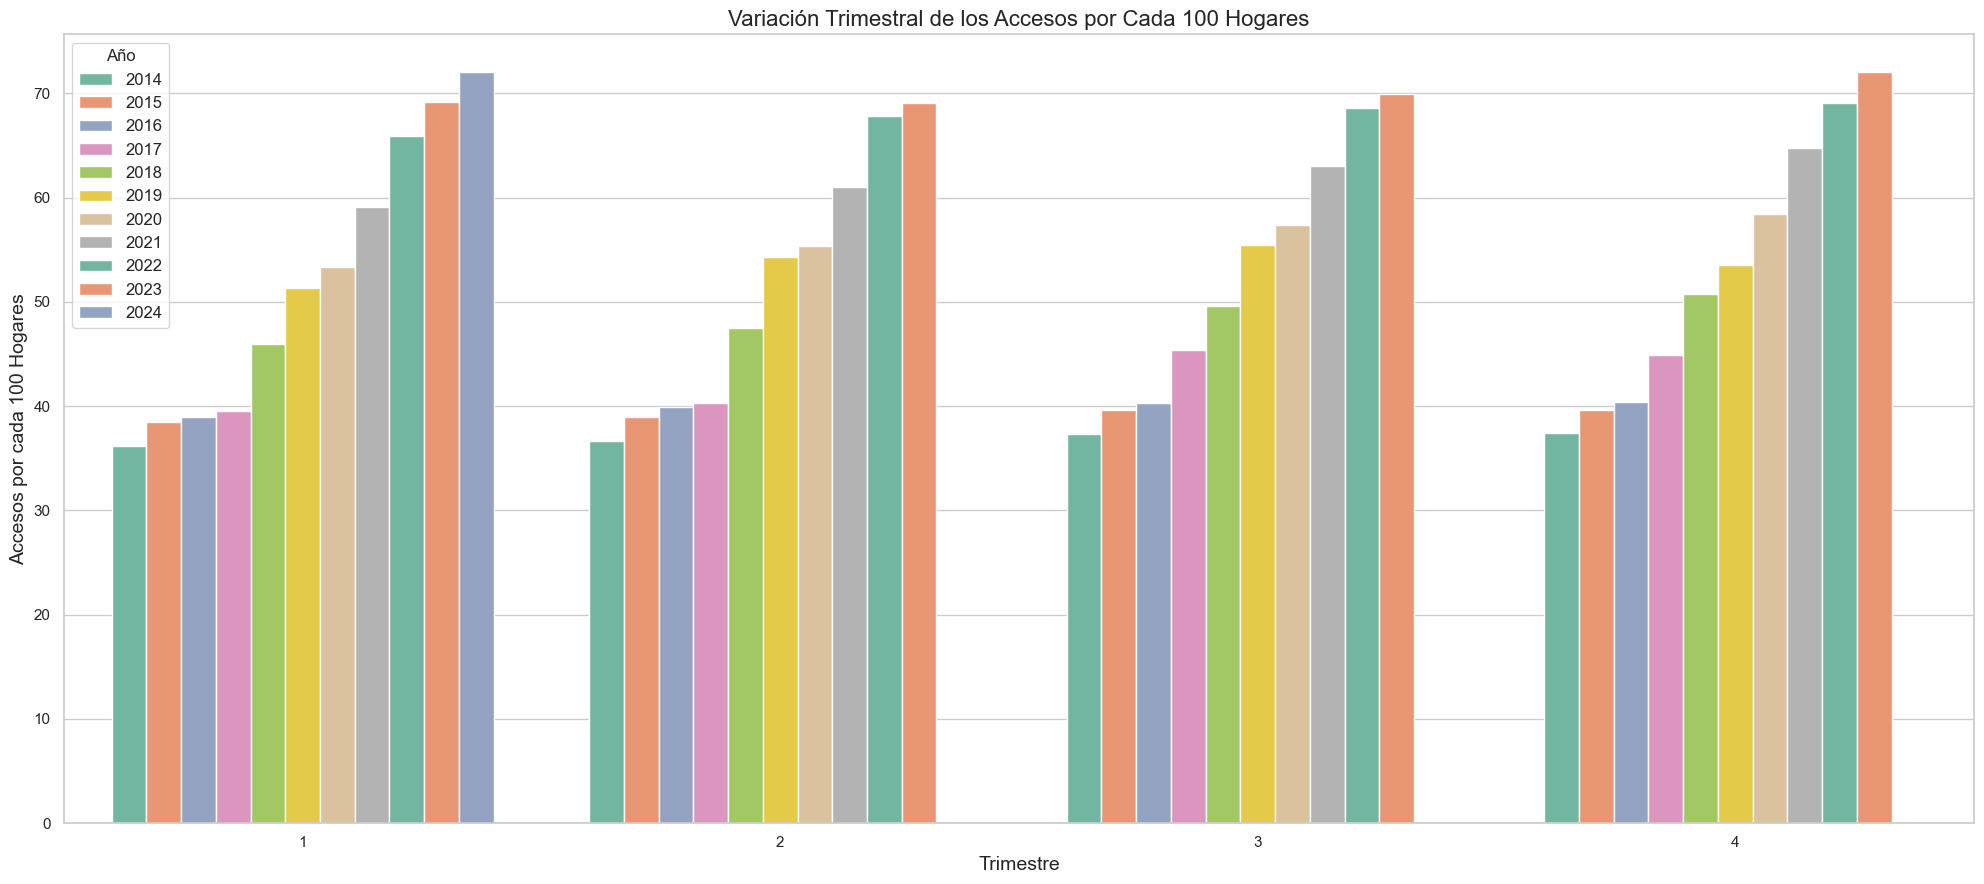

In [55]:
# Configuro el tamaño del gráfico para que sea amplio y claro
plt.figure(figsize=(20, 9))

# Creo el gráfico de barras para comparar accesos por trimestre y por año
# Uso 'errorbar=None' para eliminar las barras de error
sns.barplot(x='Trimestre', 
            y='Accesos por cada 100 hogares', 
            hue='Año', 
            data=df_penetracion_hogares, 
            errorbar=None, 
            palette='Set2')

# Personalizo el título y los ejes del gráfico
plt.title('Variación Trimestral de los Accesos por Cada 100 Hogares', fontsize=16)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Accesos por cada 100 Hogares', fontsize=14)

# Añado una leyenda con un título para clarificar el significado de los colores
plt.legend(title='Año', fontsize=12)

# Ajusto el gráfico para evitar superposición y asegurar que todo se vea bien
plt.tight_layout()

# Muestro el gráfico en la salida
plt.show()

#### Análisis de los Datos

El gráfico de barras ilustra la variación trimestral de los accesos a Internet por cada 100 hogares en Argentina desde 2014 hasta 2024. Los colores representan diferentes años, lo que permite observar tendencias y comparaciones.

Conclusiones:

* Crecimiento Sostenido: Se evidencia un aumento constante en los accesos a Internet, especialmente en 2023 y 2024.

* Estacionalidad: Los datos revelan patrones estacionales, donde ciertos trimestres presentan incrementos más marcados, lo que puede ser clave para planificar campañas de concientización y promoción de servicios de Internet.

* Tendencia General: Se observa un crecimiento sostenido en el acceso a Internet, con un aumento significativo en los últimos trimestres, especialmente en 2023 y 2024.

* Consolidación de la Conectividad: La tendencia ascendente indica que la conectividad se está fortaleciendo, lo que puede beneficiar la economía digital y la calidad de vida.

Recomendaciones:

* Inversión en Infraestructura: Mantener y aumentar la inversión en telecomunicaciones es crucial para seguir mejorando el acceso.

* Análisis de Patrones Estacionales: Profundizar en el análisis de fluctuaciones puede ayudar en la planificación estratégica.

* Fomento de la Inclusión Digital: Implementar programas que cierren la brecha digital es fundamental para garantizar que todos se beneficien de la conectividad.

### - Identificación de Outliers (Puntos Atípicos)

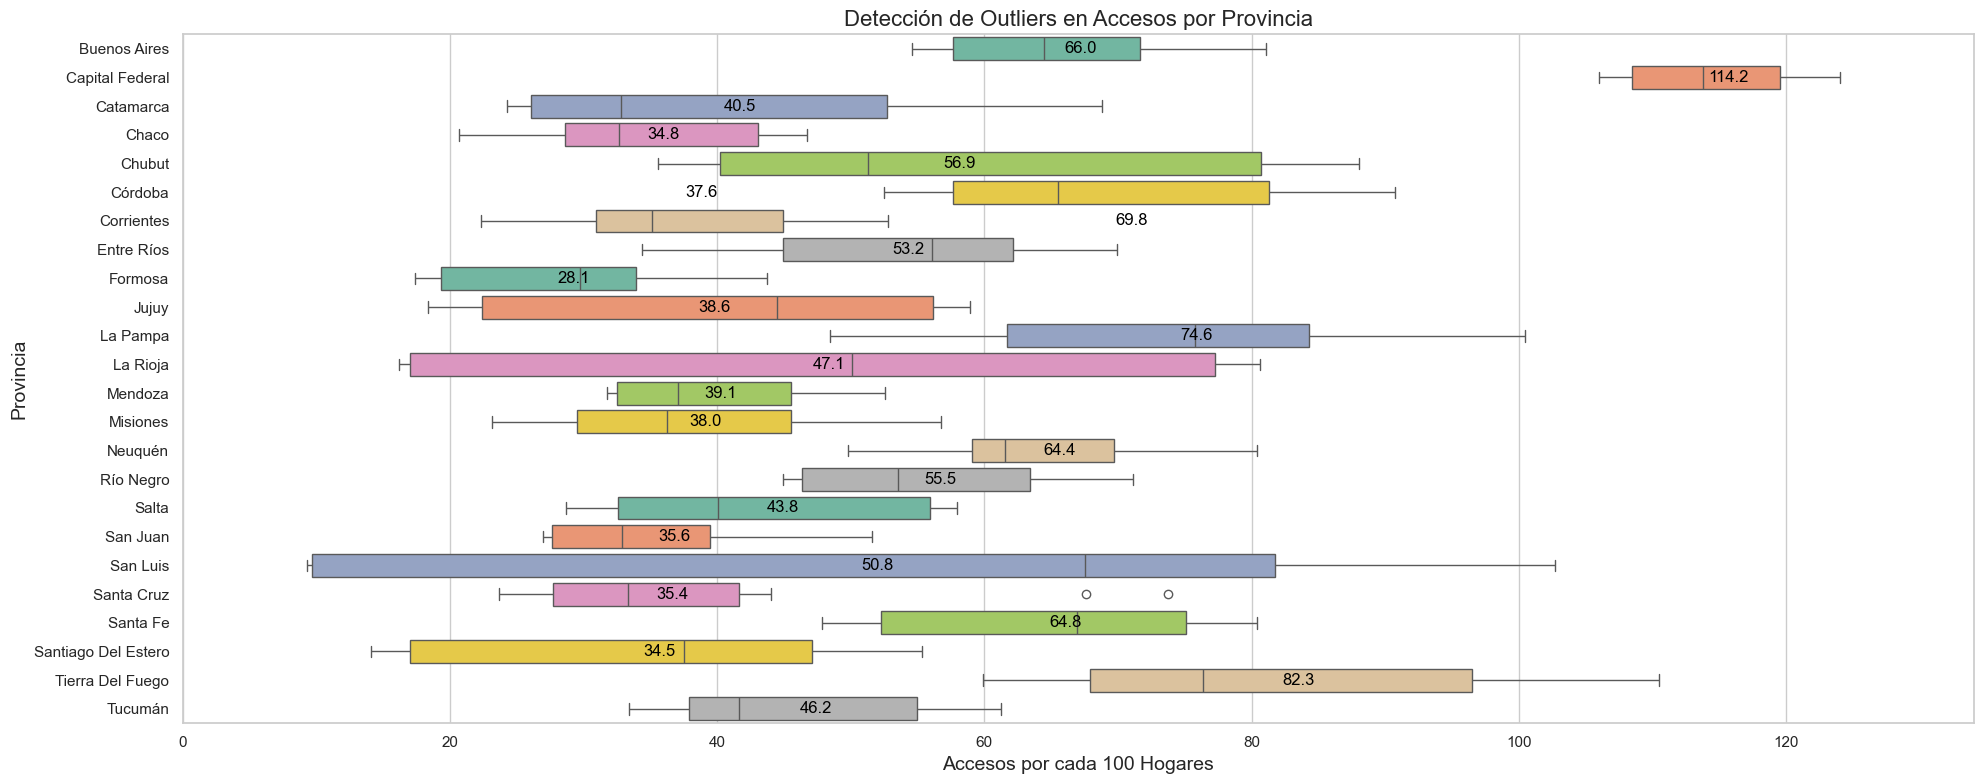

In [56]:
# Ajusto el tamano del grafico
plt.figure(figsize=(20, 8))

# Crear el boxplot
sns.boxplot(x='Accesos por cada 100 hogares', y='Provincia', data=df_penetracion_hogares,
            palette='Set2', showfliers=True, hue='Provincia')

# Añado una linea de media del acceso por provincia
means = df_penetracion_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].mean()
for i, province in enumerate(means.index):
    plt.text(means[province], i, f'{means[province]:.1f}', color='black', ha='left', va='center')

# Personalizo el titulo y etiquetas
plt.title('Detección de Outliers en Accesos por Provincia', fontsize=16)
plt.xlabel('Accesos por cada 100 Hogares', fontsize=14)
plt.ylabel('Provincia', fontsize=14)

# Ajusto los límites del eje x
plt.xlim(0, df_penetracion_hogares['Accesos por cada 100 hogares'].max() + 10)

# Ajusto el layout par evitar superposicion y muestro el grafico
plt.tight_layout()
plt.show()

### Analisis de outliers

El gráfico de detección de outliers muestra la distribución de accesos a Internet por cada 100 hogares en diferentes provincias de Argentina.

Conclusiones:

* Identificación de Outliers: Se observa que la provincia de Buenos Aires presenta un acceso notablemente alto (114.2), lo que la convierte en un outlier positivo. Este valor sugiere que Buenos Aires tiene una infraestructura de Internet significativamente más desarrollada en comparación con otras provincias.

* Desigualdad en el Acceso: Provincias como Formosa (28.1) y Chaco (34.8) muestran valores bajos, lo que indica una falta de acceso a Internet. Estos valores son outliers negativos y reflejan una desigualdad en la conectividad que puede afectar el desarrollo social y económico de estas regiones.

* Rango de Accesos: La mayoría de las provincias se agrupan en un rango de acceso entre 35 y 70 accesos por cada 100 hogares. Esto sugiere que, aunque hay un crecimiento general, aún existen disparidades significativas que deben ser abordadas.

* Impacto de la Infraestructura: Las provincias con accesos más altos, como Santa Fe (64.8) y Tierra del Fuego (82.3), probablemente han realizado inversiones más significativas en infraestructura de telecomunicaciones, lo que se traduce en un mejor acceso a Internet.


## Analisis de la hoja accesos_por_velocidad

In [57]:
# Observo la estructura del dataset
df_accesos_por_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                978 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


In [58]:
# Observo algunos datos para tener una idea sobre la informacion
df_accesos_por_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


In [59]:
# Sumo los valores faltantes por columna
valores_faltantes = df_accesos_por_velocidad.isnull().sum()
print(valores_faltantes)

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64


In [60]:
#Modifico los valores faltantes por ceros
df_accesos_por_velocidad['OTROS'] = df_accesos_por_velocidad['OTROS'].fillna(0)

# Compruebo los valores faltantes nuevamente
valores_faltantes = df_accesos_por_velocidad.isnull().sum()
print(valores_faltantes)

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64


In [61]:
# Cuento los registros duplicados
duplicados = df_accesos_por_velocidad.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 0


### - Distribución de Velocidades agrupadas

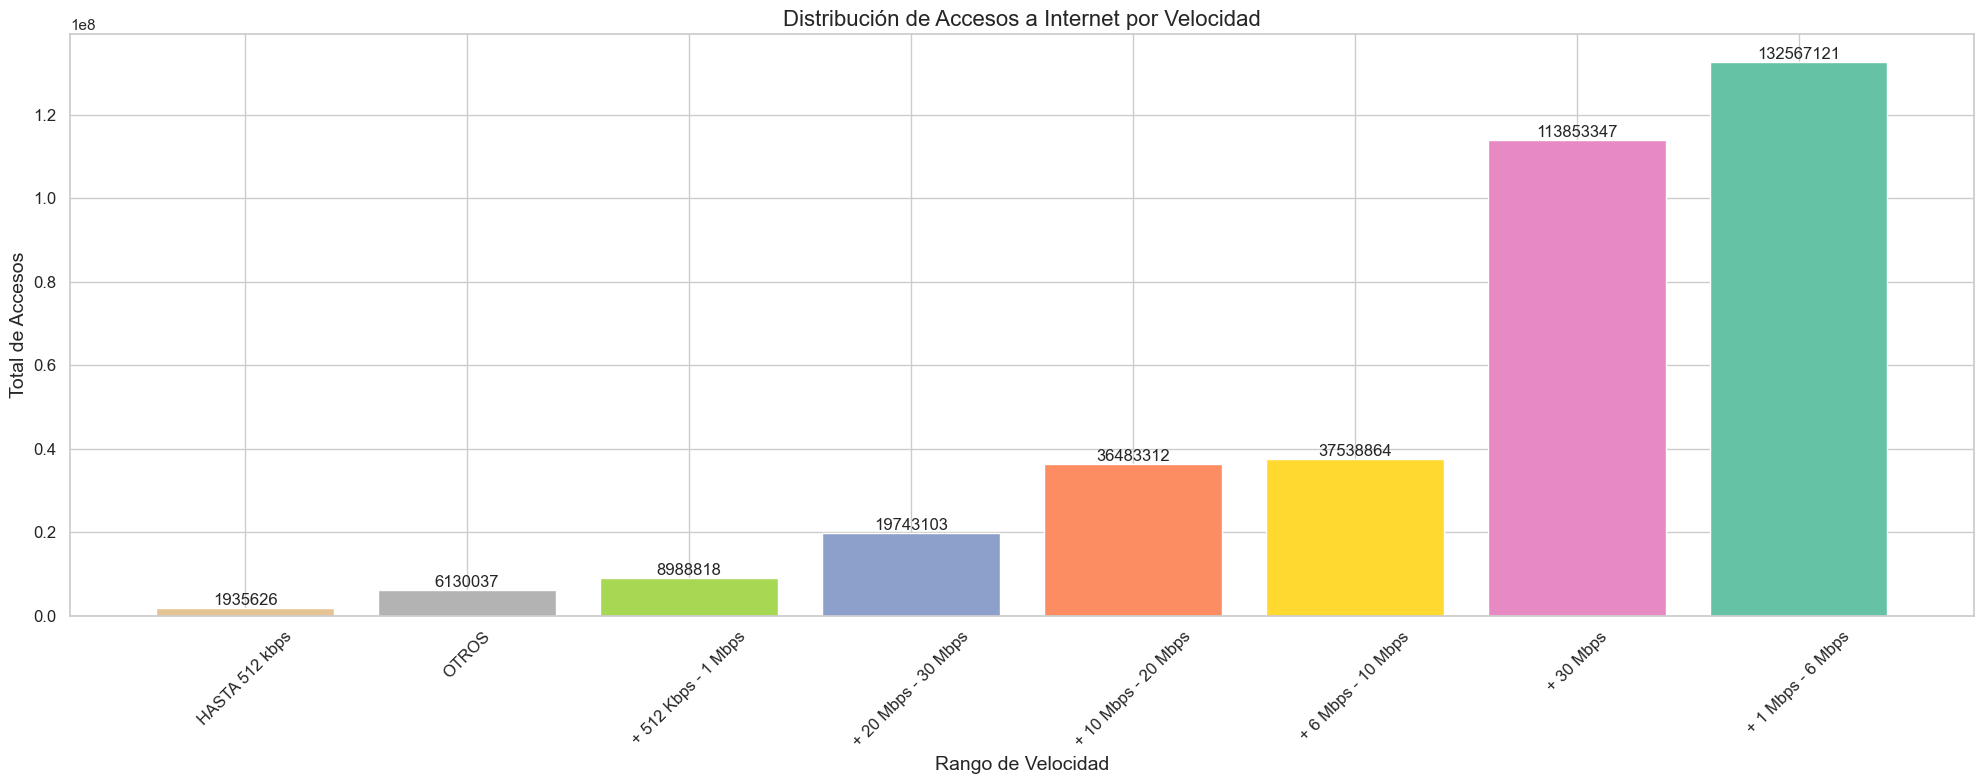

In [62]:
# Defino el tamaño del gráfico
plt.figure(figsize=(20, 8))

# Realizo una lista con los rangos de las velocidades a mostrar
velocidades = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
               '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', 
               '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Transformo el DataFrame
df_melted = df_accesos_por_velocidad.melt(id_vars=['Año', 'Trimestre', 'Provincia'], 
                                            value_vars=velocidades, 
                                            var_name='Velocidad', value_name='Accesos')

# Obtengo la paleta de colores
colors = sns.color_palette('Set2')

# Calculo los totales de accesos por velocidad y ordeno de mayor a menor
totales = df_melted.groupby('Velocidad')['Accesos'].sum().reset_index()
totales = totales.sort_values(by='Accesos', ascending=True)

# Creo un gráfico de barras
for i, row in totales.iterrows():
    plt.bar(row['Velocidad'], row['Accesos'], color=colors[i], label=row['Velocidad'])

# Añado etiquetas a las barras
for i, row in enumerate(totales.iterrows()):
    plt.annotate(f'{int(row[1]["Accesos"])}', 
                 (i, row[1]['Accesos']), 
                 ha='center', va='bottom', fontsize=12)

# Personalizo el título y los ejes
plt.title('Distribución de Accesos a Internet por Velocidad', fontsize=16)
plt.xlabel('Rango de Velocidad', fontsize=14)
plt.ylabel('Total de Accesos', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Ajusto el layout para evitar la superposición y muestro el gráfico
plt.tight_layout()
plt.show()


### Análisis de la Distribución de Accesos a Internet por Rangos de Velocidad


Predominio de Velocidades Altas:

* La categoría "+ 1 Mbps - 6 Mbps" lidera con 13,256,712 accesos, indicando que una gran parte de la población disfruta de una experiencia de navegación adecuada.

Bajo Acceso a Velocidades Inferiores:

* Las categorías "HASTA 512 kbps" (1,935,626 accesos) y "OTROS" (613,037 accesos) reflejan un acceso limitado, sugiriendo dependencia de conexiones muy lentas.

Interés en Velocidades Intermedias:

* Las categorías "+ 6 Mbps - 10 Mbps" y "+ 10 Mbps - 20 Mbps" muestran accesos de 37,538,864 y 36,483,312, respectivamente, indicando oportunidades para mejorar infraestructura y fomentar su adopción.

Adopción de Velocidades Altas (+30 Mbps):

* Las categorías de velocidad superior a 30 Mbps han visto un aumento significativo, lo que sugiere que un segmento creciente de la población está buscando y accediendo a conexiones más rápidas. Esta tendencia es un indicador positivo del avance hacia una infraestructura de telecomunicaciones más robusta y eficiente.

Oportunidades de Mejora:

* Las categorías "+ 512 Kbps - 1 Mbps" (898,818) y "+ 20 Mbps - 30 Mbps" (19,743,103) presentan baja representación, sugiriendo un enfoque en la conectividad en estas áreas.

Impacto en la Inclusión Digital:

* La desigualdad en el acceso a diferentes velocidades puede limitar la inclusión digital, ya que velocidades más altas son esenciales para el desarrollo de servicios en línea, educación a distancia y trabajo remoto.

### -Evolución Temporal de las Velocidades

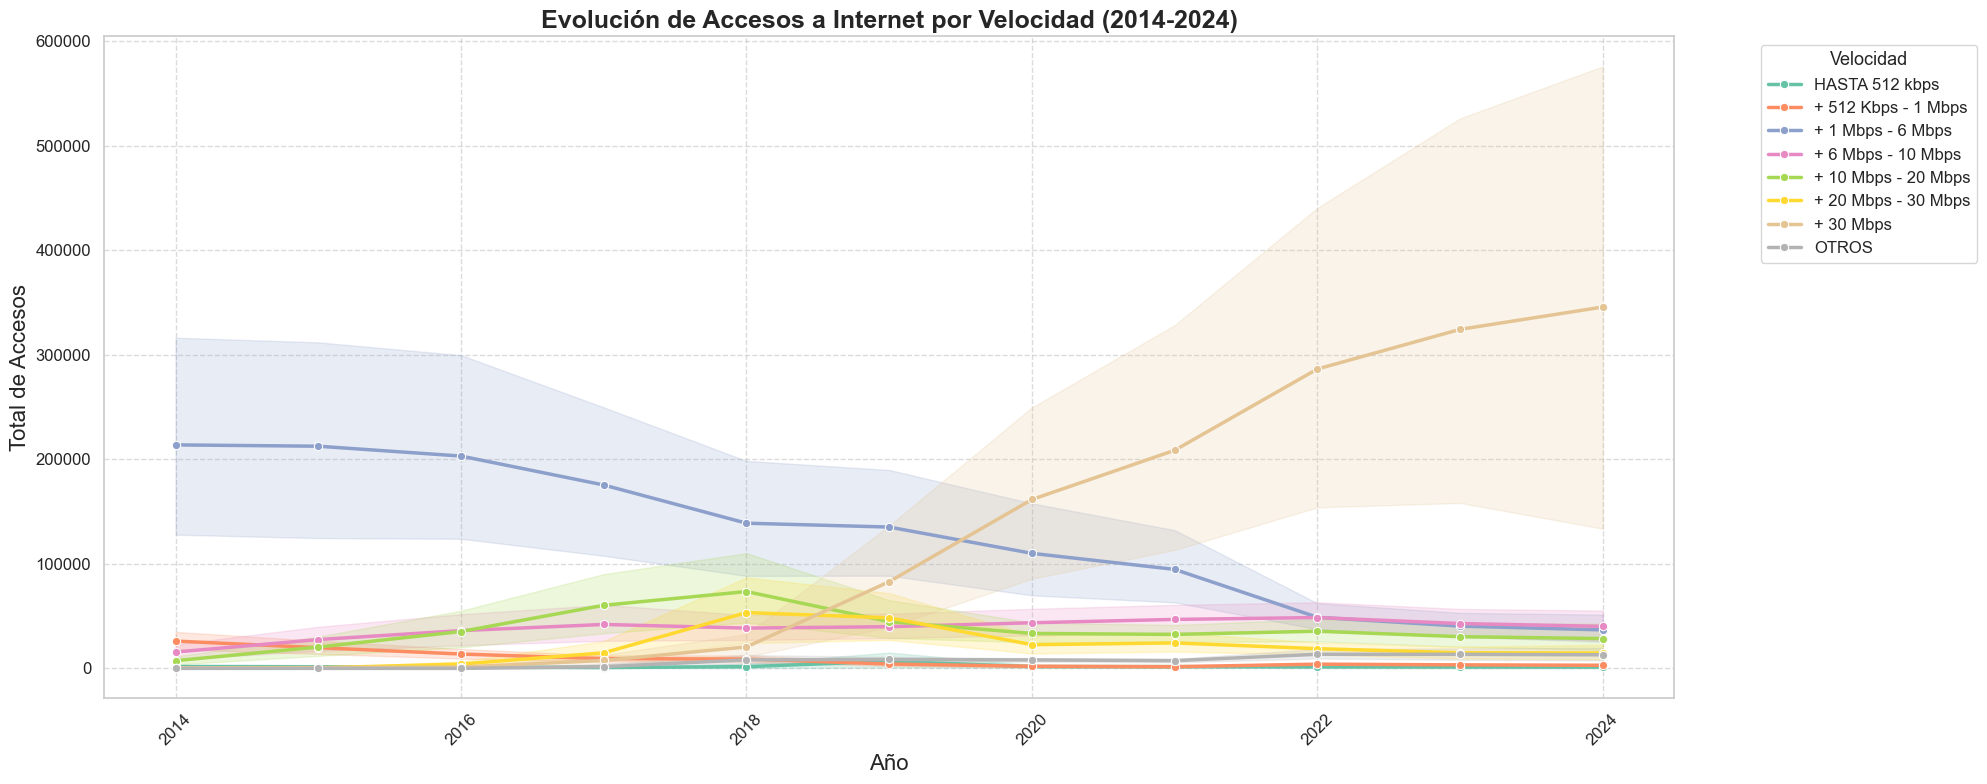

In [63]:
# Defino el tamaño del gráfico
plt.figure(figsize=(20, 8))  # Aumentar el tamaño de la figura

# Transformo el DataFrame
df_melted = df_accesos_por_velocidad.melt(id_vars=['Año', 'Trimestre', 'Provincia'], 
                                            value_vars=velocidades, 
                                            var_name='Velocidad', value_name='Accesos')

# Creo un gráfico de líneas para la evolución de accesos por velocidad
sns.lineplot(data=df_melted, x='Año', y='Accesos', hue='Velocidad', marker='o', palette='Set2', linewidth=2.5)

# Personalizo el título y los ejes
plt.title('Evolución de Accesos a Internet por Velocidad (2014-2024)', fontsize=18, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Total de Accesos', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Ajusto las márgenes
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)

# Organizo que la leyenda quede fuera del gráfico
plt.legend(title='Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13')

# Agrego una cuadrícula para mayor claridad
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Ajusto el layout para evitar la superposición y muestro el gráfico
plt.tight_layout()
plt.show()



#### Análisis de la Evolución de Accesos a Internet por Velocidad (2014-2024)
El gráfico representa la evolución de los accesos a Internet en diferentes rangos de velocidad a lo largo de los años.

conclusiones:

Tendencia General de Crecimiento:
* Se observa un crecimiento sostenido en el número de accesos a Internet, especialmente en las categorías de mayor velocidad. Esto sugiere una mejora en la infraestructura de conectividad y un aumento en la adopción de tecnologías más rápidas entre los usuarios.
Aumento en Velocidades Altas:

* Las categorías de "+ 20 Mbps" y "+ 30 Mbps" muestran un crecimiento notable, especialmente a partir de 2020. Este aumento indica que un mayor número de usuarios está accediendo a velocidades que permiten una experiencia de navegación más fluida y eficiente, facilitando actividades como el streaming y el trabajo remoto.

Estabilidad en Velocidades Bajas:
* Las categorías de menor velocidad, como "HASTA 512 kbps" y "+ 512 Kbps - 1 Mbps", muestran una tendencia a la baja o se mantienen estables. Esto puede ser un indicativo de que los usuarios están migrando hacia velocidades más altas, dejando atrás conexiones lentas que ya no satisfacen sus necesidades.

Desigualdad en el Acceso:
* A pesar del crecimiento en las velocidades más altas, las categorías intermedias (como "+ 1 Mbps - 6 Mbps" y "+ 6 Mbps - 10 Mbps") no presentan un crecimiento significativo. Esto sugiere que existe un segmento de la población que aún no tiene acceso a velocidades intermedias, lo que podría limitar su capacidad para aprovechar los servicios digitales modernos.

Impacto de la Pandemia:
* Es plausible que la pandemia de COVID-19 haya acelerado la adopción de velocidades más altas, dado que un número creciente de personas comenzó a trabajar y estudiar desde casa. Esta situación incrementó la demanda de conexiones rápidas y confiables.

Conclusión
* El análisis de la evolución de los accesos a Internet revela tanto avances significativos en la adopción de tecnologías de alta velocidad como áreas que requieren atención para mejorar la equidad en el acceso. Es esencial que se sigan realizando inversiones en infraestructura para garantizar que todas las categorías de velocidad se desarrollen, permitiendo así que más usuarios se beneficien de una conectividad adecuada en el futuro.

## Analisis de la hoja Ingresos

In [64]:
# Observo la estructura del dataset
df_ingresos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [65]:
# Observo algunos datos para tener una idea sobre la informacion
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


In [66]:
# Sumo los valores faltantes por columna
valores_faltantes = df_ingresos.isnull().sum()
print(valores_faltantes)

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


In [67]:
# Cuento los registros duplicados
duplicados = df_ingresos.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 0


In [68]:
# Observo la estructura del dataset
df_ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,41.000000,41.000000,4.100000e+01
mean,2018.878049,2.463415,3.885074e+07
std,3.689140,1.142313,5.422892e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.000000,6.912442e+06
50%,2019.000000,2.000000,2.020741e+07
75%,2021.000000,3.000000,4.299994e+07
max,2033.000000,4.000000,2.804191e+08


In [69]:
# Al observar el dato maximo de las estadisticas del .describe observo mas a detalle la columna de año
df_ingresos['Año'].unique()

array([2024, 2023, 2033, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015,
       2014], dtype=int64)

In [70]:
# Arreglo el año que se encuentra mal redactado dentro de los datos
df_ingresos['Año'] = df_ingresos['Año'].replace({2033: 2023})

# Verifico que el cambio se haya realizado de manera correcta
df_ingresos['Año'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014],
      dtype=int64)

### Evolucion de los ingresos por trimestre

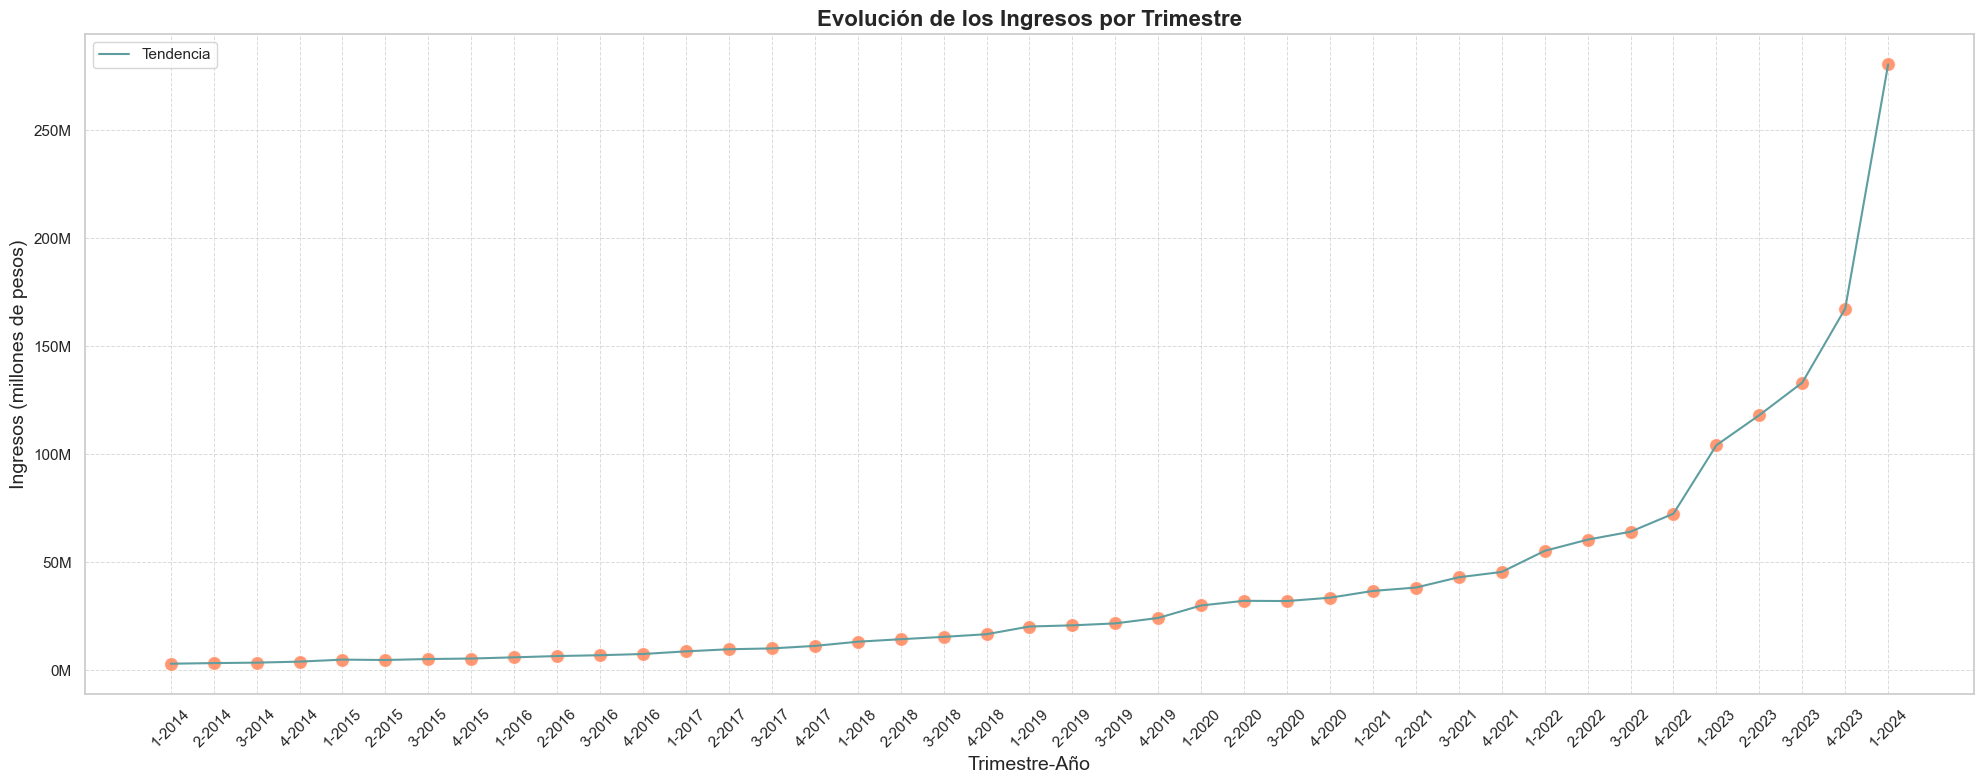

In [71]:
# Creo una nueva columna concatenando "Trimestre" y "Año"
df_ingresos['Periodo_Ordenado'] = df_ingresos['Trimestre'].astype(str) + '-' + df_ingresos['Año'].astype(str)

# Ordeno el DataFrame por el periodo temporal
df_ingresos = df_ingresos.sort_values(by=['Año', 'Trimestre'])

# Configuro el tamaño del gráfico
plt.figure(figsize=(20, 8))

# Creo el gráfico de dispersión
sns.scatterplot(data=df_ingresos, x='Periodo_Ordenado', y='Ingresos (miles de pesos)', color='Coral', s=100, alpha=0.8)

# Añado una línea de tendencia
sns.lineplot(data=df_ingresos, x='Periodo_Ordenado', y='Ingresos (miles de pesos)', color='cadetblue', label='Tendencia')

# Personalizo el título y las etiquetas
plt.title('Evolución de los Ingresos por Trimestre', fontsize=16, fontweight='bold')
plt.xlabel('Trimestre-Año', fontsize=14)
plt.ylabel('Ingresos (millones de pesos)', fontsize=14)

# Ajusto el formato de los números en el eje Y (en millones)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Roto las etiquetas del eje X para mejorar la visualizacion
plt.xticks(rotation=45)

# Añado una cuadricula para mayor claridad
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Ajusto el layout para evitar superposiciones
plt.tight_layout()

# Muestro el gráfico
plt.show()

#### Análisis de la Evolución de los Ingresos por Trimestre (2014-2024)

* Crecimiento Acelerado: A partir de 2020, los ingresos muestran un incremento más marcado, posiblemente impulsado por factores externos como la pandemia y la mayor digitalización. Esto indica un cambio positivo en la estrategia o el mercado.

* Estabilidad en los Primeros Años: Durante los primeros años (2014-2019), los ingresos parecen ser relativamente estables y bajos, lo que podría indicar un periodo de establecimiento o consolidación del negocio.

* Fluctuaciones Temporales: A lo largo del periodo analizado, se observan ciertas caídas en trimestres específicos, lo que puede deberse a factores estacionales o eventos puntuales.

* Máximos Recientes: Los trimestres más recientes muestran ingresos significativamente altos, alcanzando un máximo cercano a los 280 millones de pesos, reflejando una fase de expansión o mayor éxito en la estrategia comercial.

* Proyección Positiva: Si la tendencia actual continúa, los ingresos seguirán aumentando, pero será importante monitorear las fluctuaciones para anticipar posibles riesgos.

### -Distribucion de los ingresos

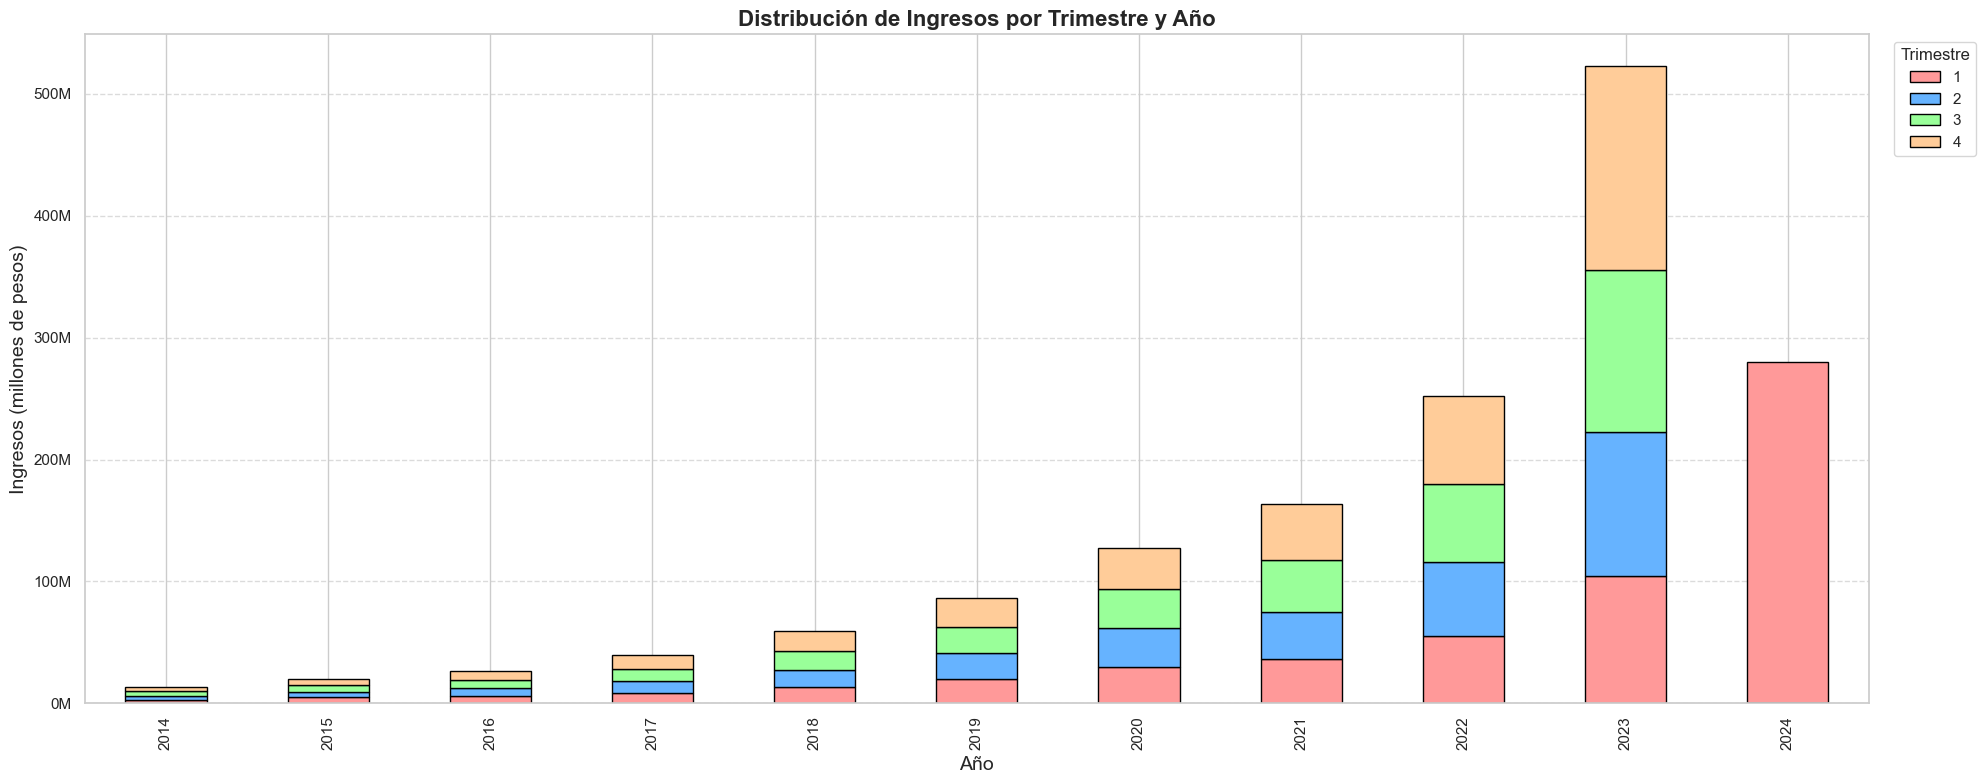

In [72]:
# Reorganizo los datos
df_pivot = df_ingresos.pivot_table(values='Ingresos (miles de pesos)', index='Año', columns='Trimestre', aggfunc='sum')

# Configuro el tamaño del gráfico
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(20, 8), color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], edgecolor='black')


# Personalizo el título y los ejes
plt.title('Distribución de Ingresos por Trimestre y Año', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Ingresos (millones de pesos)', fontsize=14)

# Ajusto del formato de los números en el eje Y (en millones)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))


# Añado una cuadricula solo en el eje y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Personalizo la leyenda
plt.legend(title='Trimestre', bbox_to_anchor=(1.01, 1), loc='upper left')

# Ajusto el layout para evitar superposición
plt.tight_layout()

# Muestro el gráfico
plt.show()


### Analisis de la distribucion de los ingresos por año y trimestre

Incremento Notable en 2021: 

* El año 2021 destaca por un aumento considerable en los ingresos, alcanzando un pico que supera los 500 millones de pesos. Esto podría indicar un año excepcional, posiblemente debido a factores como la recuperación económica post-pandemia, lanzamientos de nuevos productos o servicios, o una mayor demanda en el mercado.

Variabilidad por Trimestre: 

* La distribución de ingresos por trimestre muestra que ciertos trimestres (como el primero y el cuarto) tienden a generar más ingresos que otros. Esto puede reflejar patrones estacionales en la actividad del negocio, donde ciertos trimestres son más fuertes debido a factores como ventas navideñas o lanzamientos de productos.

Proyección Futura: 

* La tendencia ascendente sugiere que, si se mantienen las condiciones actuales, los ingresos podrían seguir aumentando en los próximos trimestres. Esto es positivo para la sostenibilidad del negocio.

Diversificación de Ingresos:

* A medida que avanzamos hacia 2022 y 2023, se observa una diversificación en los ingresos, con contribuciones más equilibradas de cada trimestre. Esto puede ser un signo de una estrategia más robusta y diversificada.

### Organizacion de datos Finales

In [73]:
# Para la visualizacion voy a centrarme en las 30 velocidades mas frecuentes para lo cual voy a crear un dataframe con esta informacion

# Calculo la media de las velocidades desde la cuarta columna en adelante
media_velocidades = df_velocidad_sin_Rangos.iloc[:, 4:].mean() 

# Ordeno y selecciono las 30 velocidades más frecuentes
velocidades_mas_frecuentes = media_velocidades.sort_values(ascending=False).head(30)

# Filtro el dataframe original para que coincida con las 30 velocidades más frecuentes

# Mantengo las filas y columnas relevantes incluyendo Año, Trimestre y Provincia
columnas_relevantes = ['Año', 'Trimestre', 'Provincia'] + list(velocidades_mas_frecuentes.index)

# Filtro el dataframe original, manteniendo solo las 30 velocidades más frecuentes y las columnas adicionales
df_velocidades_filtradas = df_velocidad_sin_Rangos[columnas_relevantes]

# Verifico el dataframe final
df_velocidades_filtradas.head()

,Año,Trimestre,Provincia,50 Mbps,6 Mbps,100 Mbps,10 Mbps,300 Mbps,30 Mbps,25 Mbps,12 Mbps,20 Mbps,3 Mbps,150 Mbps,"3,5 Mbps",15 Mbps,60 Mbps,8 Mbps,1 Mbps,5 Mbps,2 Mbps,500 Mbps,4 Mbps,18 Mbps,1000 Mbps,"0,5 Mbps",75 Mbps,"0,75 Mbps",7 Mbps,200 Mbps,9 Mbps,24 Mbps,600 Mbps
0,2024.0,1.0,Buenos Aires,504344.0,75439.0,865122.0,157372.0,1060257.0,782651.0,42701.0,21114.0,124540.0,43554.0,484778.0,41735.0,94414.0,75495.0,63826.0,17899.0,27327.0,19520.0,149680.0,13365.0,1080.0,156691.0,25815.0,1599.0,4611.0,11286.0,7739.0,688.0,106.0,12163.0
1,2024.0,1.0,Capital Federal,66357.0,9017.0,375600.0,34541.0,553467.0,58579.0,433.0,92.0,7537.0,3971.0,147085.0,11975.0,29730.0,17314.0,16864.0,4111.0,3547.0,249.0,86440.0,994.0,0.0,68405.0,451.0,1091.0,1307.0,7.0,3301.0,3.0,0.0,372.0
2,2024.0,1.0,Catamarca,35211.0,780.0,17716.0,3424.0,8099.0,861.0,47.0,31.0,2272.0,1644.0,0.0,0.0,1901.0,0.0,0.0,176.0,332.0,115.0,372.0,1.0,0.0,20.0,34.0,0.0,0.0,0.0,42.0,0.0,914.0,834.0
3,2024.0,1.0,Chaco,33117.0,4784.0,55941.0,8237.0,23172.0,2294.0,3435.0,137.0,1975.0,2925.0,0.0,167.0,3421.0,0.0,700.0,416.0,5115.0,780.0,1610.0,385.0,0.0,150.0,234.0,0.0,0.0,106.0,1053.0,1.0,0.0,679.0
4,2024.0,1.0,Chubut,31184.0,14321.0,1255.0,18414.0,158.0,7643.0,5560.0,5603.0,3484.0,5642.0,0.0,11441.0,13739.0,2.0,13374.0,247.0,4369.0,1870.0,3.0,6185.0,0.0,0.0,69.0,0.0,836.0,76.0,1.0,21.0,8047.0,31.0


In [74]:
# Al observar 3 dataframes observo que solo tienen una columna diferencial y las demas se mantienen por lo que decido unirlos y compactar la informacion

# Uno df_penetracion_poblacion con df_penetracion_hogares
df_unido = pd.merge(df_penetracion_poblacion, df_penetracion_hogares, 
                     on=['Año', 'Trimestre', 'Provincia'], how='inner')

# Uno el resultado con df_velocidad_por_prov
df_unido_por_prov_poblacion_hogares = pd.merge(df_unido, df_velocidad_por_prov, 
                     on=['Año', 'Trimestre', 'Provincia'], how='inner')
# Verifico el dataframe unido
df_unido_por_prov_poblacion_hogares.head()


,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares,Mbps (Media de bajada)
0,2024,1,Buenos Aires,27.80,81.10,159.13
1,2024,1,Capital Federal,48.78,119.53,229.94
2,2024,1,Catamarca,17.50,68.82,91.45
3,2024,1,Chaco,12.48,46.70,107.51
4,2024,1,Chubut,26.02,84.89,20.50


In [75]:
# Crear una nueva columna 'Tecnologías Usadas' que combine todas las tecnologías disponibles en esa provincia
df_accesos_totales_sin_outliers['Tecnologias'] = df_accesos_totales_sin_outliers.apply(lambda row: ', '.join([tech for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless'] if row[tech] > 0]), axis=1)
df_totales_accesos_por_Tecnologia['Tecnologias'] = df_totales_accesos_por_Tecnologia.apply(lambda row: ', '.join([tech for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless'] if row[tech] > 0]), axis=1)
# Ver el DataFrame actualizado
df_accesos_totales_sin_outliers.head()
df_totales_accesos_por_Tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo,Tecnologias
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024,"ADSL, Cablemodem, Fibra óptica, Wireless"
1,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023,"ADSL, Cablemodem, Fibra óptica, Wireless"
2,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023,"ADSL, Cablemodem, Fibra óptica, Wireless"
3,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023,"ADSL, Cablemodem, Fibra óptica, Wireless"
4,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023,"ADSL, Cablemodem, Fibra óptica, Wireless"


In [76]:
# Crear un DataFrame con las latitudes y longitudes correctas de las provincias
coordenadas_corregidas = {
    'Provincia': [
        'Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 
        'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos', 
        'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 
        'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 
        'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 
        'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 
        'Tucumán'
    ],
    'Latitud': [
        -38.4161, -34.6118, -28.6692, -26.3922, 
        -43.3073, -31.4165, -27.3926, -32.9402, 
        -25.9961, -24.1855, -36.6065, -29.2840, 
        -32.8902, -27.3530, -38.9515, -41.3127, 
        -24.7822, -31.5374, -33.2998, -49.0000, 
        -31.6358, -27.7900, -54.7996, -26.8240
    ],
    'Longitud': [
        -60.2875, -58.3772, -65.5000, -60.9957, 
        -67.7260, -64.1888, -58.8340, -60.4338, 
        -58.1975, -65.2998, -64.2895, -67.1092, 
        -68.8272, -54.5035, -68.0592, -65.0010, 
        -65.4232, -68.5367, -66.3350, -70.0000, 
        -60.7050, -64.2660, -68.3029, -65.2220
    ]
}

# Convertir el diccionario en un DataFrame
df_coordenadas = pd.DataFrame(coordenadas_corregidas)

# Mostrar el DataFrame resultante
print(df_coordenadas)

              Provincia  Latitud  Longitud
0          Buenos Aires -38.4161  -60.2875
1       Capital Federal -34.6118  -58.3772
2             Catamarca -28.6692  -65.5000
3                 Chaco -26.3922  -60.9957
4                Chubut -43.3073  -67.7260
5               Córdoba -31.4165  -64.1888
6            Corrientes -27.3926  -58.8340
7            Entre Ríos -32.9402  -60.4338
8               Formosa -25.9961  -58.1975
9                 Jujuy -24.1855  -65.2998
10             La Pampa -36.6065  -64.2895
11             La Rioja -29.2840  -67.1092
12              Mendoza -32.8902  -68.8272
13             Misiones -27.3530  -54.5035
14              Neuquén -38.9515  -68.0592
15            Río Negro -41.3127  -65.0010
16                Salta -24.7822  -65.4232
17             San Juan -31.5374  -68.5367
18             San Luis -33.2998  -66.3350
19           Santa Cruz -49.0000  -70.0000
20             Santa Fe -31.6358  -60.7050
21  Santiago Del Estero -27.7900  -64.2660
22     Tier

In [77]:
# Guardar los archivos finales que van a ser usados para la visualizacion en Power Bi
df_accesos_por_velocidad.to_parquet('../Archivos_Finales/accesos_por_rango_velocidad', index=False)
df_ingresos.to_parquet('../Archivos_Finales/Ingresos_por_año_y_trimestre', index=False)
df_totales_accesos_por_Tecnologia.to_parquet('../Archivos_Finales/accesos_totales_por_tec', index=False)
df_velocidades_filtradas.to_parquet('../Archivos_Finales/top_30_velocidades_provincia', index=False)
df_coordenadas.to_parquet('../Archivos_Finales/coordenadas', index=False)
df_unido_por_prov_poblacion_hogares.to_parquet('../Archivos_Finales/para_kpi_1_y_3', index=False)
df_accesos_totales_sin_outliers.to_parquet('../Archivos_Finales/para_kpi_2', index=False)